# Package Import

In [2]:
import re
import glob
import os

import pandas as pd 

import pylint.lint
import nbformat

import numpy as np
import math

import sqlite3

from scipy.stats import skew
from scipy.stats import kurtosis
from scipy.stats import kstest
from scipy.stats import mannwhitneyu
from scipy.stats import kendalltau
from scipy import stats
from scipy.stats import chi2_contingency

from cliffs_delta import cliffs_delta
import rbo

import seaborn as sns
from matplotlib import pyplot as plt

# DB Connection SQlite

In [68]:
conn = sqlite3.connect(r"data/nb_pylint_result.db")

In [69]:
df_ratings = pd.read_sql_query("SELECT * from NBRATING", conn)
df_nbfiles = pd.read_sql_query("SELECT * from NBFILES", conn)

df_rating_with_type = pd.merge(df_ratings, df_nbfiles,  how='left', left_on=['Filename'], right_on = ['Filename'])
df_rating_with_type

,Filename,Rating,Type
0,nb_data/part_1/KT_dataset/jixunchen_lung-segme...,0.00,nonml
1,nb_data/part_1/KT_dataset/kerneler_starter-new...,1.69,ml
2,nb_data/part_1/KT_dataset/dengjingyuan_simple-...,7.35,ml
3,nb_data/part_1/KT_dataset/pdthomsen_learn-pyth...,0.00,nonml
4,nb_data/part_1/KT_dataset/poojanagure_biginer-...,0.00,ml
...,...,...,...
246594,nb_data/part_9/KT_dataset/ruiknemui_kernel2daf...,2.79,ml
246595,nb_data/part_9/KT_dataset/aerrkhis_titanic-cha...,0.00,ml
246596,nb_data/part_9/KT_dataset/prashdash112_911-cal...,9.42,nonml
246597,nb_data/part_9/KT_dataset/peaceagent_resnext10...,2.75,ml


In [70]:
df_nbfiles[:1].Filename[0]

'nb_data/part_1/KT_dataset/jixunchen_lung-segmentation-and-candidate-points-generation.ipynb'

# Dataset Description

In [71]:
df_dataset_description = pd.read_csv("data/nb_dataset_loc_sloc.csv")

Here we use only executive code line (sloc) as LOC 

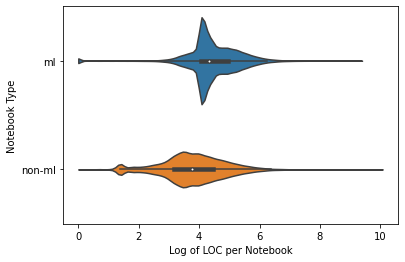

In [7]:
fig = sns.violinplot(data=df_dataset_description, x="logsloc", y="type", cut=0)
fig.set(xlabel='Log of LOC per Notebook', ylabel='Notebook Type')

fig.figure.savefig('sloc_bean.pdf', bbox_inches="tight")
fig.figure.show()

In [72]:
df_dataset_description

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Filename,loc,sloc,type,logloc,logsloc
0,0,0,0,kerneler_starter-chicago-sex-offenders-e8744bf...,169,87,ml,5.129899,4.465908
1,1,1,1,turksoyomer_deep-learning-methods-on-malaria-c...,304,134,ml,5.717028,4.897840
2,2,2,2,thomascong_dirnet.py,608,388,ml,6.410175,5.961005
3,3,3,3,discdiver_testing-prophet-for-time-series-pred...,590,143,non-ml,6.380123,4.962845
4,4,4,4,ritayandhara_lin-regression-class-fromscratch.py,170,74,ml,5.135798,4.304065
...,...,...,...,...,...,...,...,...,...
242359,242359,242359,242359,kerneler_starter-modified-arabic-handwritten-6...,106,59,ml,4.663439,4.077537
242360,242360,242360,242360,anshulkataria_exercise-underfitting-and-overfi...,131,32,ml,4.875197,3.465736
242361,242361,242361,242361,ratamjose_a-complete-m5-exploratory-data-analy...,888,586,non-ml,6.788972,6.373320
242362,242362,242362,242362,jefffan27_911-calls-exploratory-data-analysis.py,362,55,non-ml,5.891644,4.007333


## Median of Line of Code

Median of Line of Code in ML Notebooks

In [9]:
df_dataset_description[df_dataset_description.type == 'ml'].sloc.median()

75.0

Median of Line of Code in Non-ML Notebooks

In [10]:
df_dataset_description[df_dataset_description.type == 'non-ml'].sloc.median()

43.0

## Line of Code Normality Check

In [11]:
stats.kstest(df_dataset_description[df_dataset_description['type']=='ml']['sloc'],  'norm')

KstestResult(statistic=0.9878631988999977, pvalue=0.0)

In [12]:
stats.kstest(df_dataset_description[df_dataset_description['type']=='non-ml']['sloc'],  'norm')

KstestResult(statistic=0.9963626726309959, pvalue=0.0)

## Line of Code Mann Whitney U Test

In [13]:
s, p = stats.mannwhitneyu(df_dataset_description[df_dataset_description['type']=='ml']['sloc'], df_dataset_description[df_dataset_description['type']=='non-ml']['sloc'])
d, res = cliffs_delta( df_dataset_description[df_dataset_description['type']=='ml']['sloc'], df_dataset_description[df_dataset_description['type']=='non-ml']['sloc'])

print (s, p, d, res)

8416363936.5 0.0 0.41166847702524634 medium


In [ ]:
df_dataset_description[df_dataset_description['type']=='ml']

In [1889]:

ml_nb_2 = df_dataset_description[df_dataset_description['type']=='ml']
nonml_nb_2 = df_dataset_description[df_dataset_description['type']=='non-ml']

unique_freq_sloc = df_dataset_description.sloc.unique()

sloc_ml_2_list, sloc_nonml_2_list = [], [] 

for unique_sloc in unique_freq_sloc:
    sloc_ml_2 = ml_nb_2[ml_nb_2.sloc == unique_sloc]
    sloc_nonml_2 = nonml_nb_2[nonml_nb_2.sloc == unique_sloc]

    sloc_ml_2_list.append(len(sloc_ml_2))
    sloc_nonml_2_list.append(len(sloc_nonml_2))

    
obs = np.array([sloc_ml_2_list, sloc_nonml_2_list])

X2,p, dof, expected = stats.chi2_contingency(obs, correction=False)
N = np.sum(obs)
minimum_dimension = min(obs.shape)-1
  
# Calculate Cramer's V
result = np.sqrt((X2/N) / minimum_dimension)

print (N, obs.shape, X2/N)
  
# Print the result
print('Chi-Square: ', X2,  '  p_value:  ',  p,  'Effect Size Cramers V: ', result)

242364 (2, 1354) 0.25649720170681567
Chi-Square:  62165.68779447068   p_value:   0.0 Effect Size Cramers V:  0.5064555278667769


# RQ1: How does Jupyter Notebook code quality differ between ML and non-ML projects?

In [14]:
df_rating_with_type = pd.merge(df_ratings, df_nbfiles,  how='left', left_on=['Filename'], right_on = ['Filename'])
df_rating_with_type

,Filename,Rating,Type
0,nb_data/part_1/KT_dataset/jixunchen_lung-segme...,0.00,nonml
1,nb_data/part_1/KT_dataset/kerneler_starter-new...,1.69,ml
2,nb_data/part_1/KT_dataset/dengjingyuan_simple-...,7.35,ml
3,nb_data/part_1/KT_dataset/pdthomsen_learn-pyth...,0.00,nonml
4,nb_data/part_1/KT_dataset/poojanagure_biginer-...,0.00,ml
...,...,...,...
246594,nb_data/part_9/KT_dataset/ruiknemui_kernel2daf...,2.79,ml
246595,nb_data/part_9/KT_dataset/aerrkhis_titanic-cha...,0.00,ml
246596,nb_data/part_9/KT_dataset/prashdash112_911-cal...,9.42,nonml
246597,nb_data/part_9/KT_dataset/peaceagent_resnext10...,2.75,ml


In [15]:
df_rating_with_type[:1].Filename[0]

'nb_data/part_1/KT_dataset/jixunchen_lung-segmentation-and-candidate-points-generation.ipynb'

In [16]:
df_ml_rating = df_rating_with_type[df_rating_with_type['Type'] == 'ml']
df_nonml_rating = df_rating_with_type[df_rating_with_type['Type'] == 'nonml']
    

In [17]:
df_ml_rating['Rating'].describe()

count    177252.000000
mean          2.345080
std           1.954281
min           0.000000
25%           0.360000
50%           2.240000
75%           3.520000
max           9.730000
Name: Rating, dtype: float64

In [18]:
df_nonml_rating['Rating'].describe()

count    69347.000000
mean         3.262127
std          2.915291
min          0.000000
25%          0.000000
50%          3.260000
75%          5.810000
max         10.000000
Name: Rating, dtype: float64

## Statistical Test

### Normality Check of Code Quality Rating Distribution

In [19]:
# null hypothesis > 0.05: issue distribution comes from a normal distribution
s1, p1 = stats.kstest(df_ml_rating['Rating'],  'norm')
print ('ML NB Ratings', s1, p1, "Normal Distribution" if p1 > 0.05 else "Not Normal Distribution")

s2, p2 = stats.kstest(df_nonml_rating['Rating'],  'norm')
print ('Non-ML NB Ratings', s2, p2, "Normal Distribution" if p2 > 0.05 else "Not Normal Distribution")


ML NB Ratings 0.5833427915118812 0.0 Not Normal Distribution
Non-ML NB Ratings 0.5639803682897546 0.0 Not Normal Distribution


### Mann Whitney U Test

In [22]:
statistic, p = stats.mannwhitneyu(df_ml_rating['Rating'], df_nonml_rating['Rating'])
if ( p < 0.05):
    result = cliffs_delta( df_ml_rating['Rating'], df_nonml_rating['Rating'])

print ('MWU: ', statistic, ";  p_value: ", p, "; Cliffs d:", abs(round(result[0], 2)))

MWU:  5244115092.0 ;  p_value:  0.0 ; Cliffs d: 0.15


### Skewness and Kartiosys 

In [29]:
# Calculate the skewness
print('Skewness ML Ratings: ', round(skew(df_ml_rating['Rating'], axis=0, bias=True), 2))

print('Skewness non-ML Ratings: ', round(skew(df_nonml_rating['Rating'], axis=0, bias=True), 2))

Skewness ML Ratings:  0.6
Skewness non-ML Ratings:  0.23


In [31]:
# Calculate the kurtosis
print('kurtosis ML Ratings: ', round(kurtosis(df_ml_rating['Rating'], axis=0, bias=True), 2))

print('kurtosis non-ML Ratings: ', round(kurtosis(df_nonml_rating['Rating'], axis=0, bias=True), 2))

kurtosis ML Ratings:  -0.21
kurtosis non-ML Ratings:  -1.37


In [32]:
df_rating_with_type

,Filename,Rating,Type
0,nb_data/part_1/KT_dataset/jixunchen_lung-segme...,0.00,nonml
1,nb_data/part_1/KT_dataset/kerneler_starter-new...,1.69,ml
2,nb_data/part_1/KT_dataset/dengjingyuan_simple-...,7.35,ml
3,nb_data/part_1/KT_dataset/pdthomsen_learn-pyth...,0.00,nonml
4,nb_data/part_1/KT_dataset/poojanagure_biginer-...,0.00,ml
...,...,...,...
246594,nb_data/part_9/KT_dataset/ruiknemui_kernel2daf...,2.79,ml
246595,nb_data/part_9/KT_dataset/aerrkhis_titanic-cha...,0.00,ml
246596,nb_data/part_9/KT_dataset/prashdash112_911-cal...,9.42,nonml
246597,nb_data/part_9/KT_dataset/peaceagent_resnext10...,2.75,ml


## Graph for RQ1

In [35]:
df_graph_for_rq1 = df_rating_with_type

In [36]:
df_graph_for_rq1

,Filename,Rating,Type
0,nb_data/part_1/KT_dataset/jixunchen_lung-segme...,0.00,nonml
1,nb_data/part_1/KT_dataset/kerneler_starter-new...,1.69,ml
2,nb_data/part_1/KT_dataset/dengjingyuan_simple-...,7.35,ml
3,nb_data/part_1/KT_dataset/pdthomsen_learn-pyth...,0.00,nonml
4,nb_data/part_1/KT_dataset/poojanagure_biginer-...,0.00,ml
...,...,...,...
246594,nb_data/part_9/KT_dataset/ruiknemui_kernel2daf...,2.79,ml
246595,nb_data/part_9/KT_dataset/aerrkhis_titanic-cha...,0.00,ml
246596,nb_data/part_9/KT_dataset/prashdash112_911-cal...,9.42,nonml
246597,nb_data/part_9/KT_dataset/peaceagent_resnext10...,2.75,ml


In [37]:
x = df_graph_for_rq1[df_graph_for_rq1.Type == 'ml']
y = df_graph_for_rq1[df_graph_for_rq1.Type == 'nonml']


In [38]:
x.Rating.to_numpy()

array([1.69, 7.35, 0.  , ..., 0.  , 2.75, 2.24])

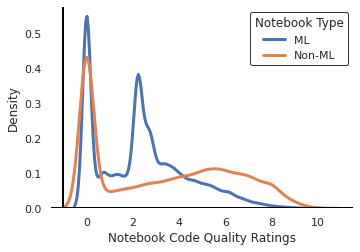

In [39]:
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

sns.set(font_scale=1)

fig, ax = plt.subplots()
plt.grid(False)
ax.set_facecolor('white')
# ax.spines['bottom'].set_color('black')
# ax.spines['left'].set_color('black')
plt.subplots_adjust(left=0.2,bottom=0.2, top = 0.9, right = 0.9)

array1 = x.Rating.to_numpy()
array2 = y.Rating.to_numpy()

# Create a density plot for each array
sns.kdeplot(array1, label="ML ", ax=ax, lw=3)
sns.kdeplot(array2, label="Non-ML", ax=ax, lw=3)

sns.despine(left=True, bottom=True)

# Add labels to the x-axis and y-axis
plt.xlabel('Notebook Code Quality Ratings')
plt.ylabel('Density')

plt.axhline(0, color='black', lw=3)
plt.axvline(-1, color='black', lw=2)

# Add a legend to the plot
plt.legend(title = 'Notebook Type', facecolor="white", edgecolor="black")

# Display the plot
plt.show()

fig.savefig("rating_v2.pdf", format="pdf", transparent=True)

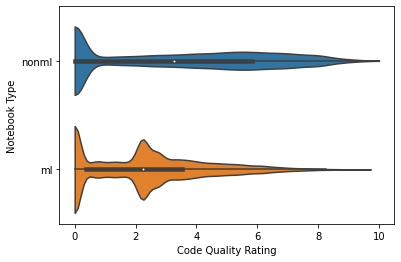

In [30]:
fig = sns.violinplot(data=df_rating_with_type, x="Rating", y="Type", cut=0)
fig.set(xlabel='Code Quality Rating', ylabel='Notebook Type')

fig.figure.savefig('rating.pdf', bbox_inches="tight")

fig.figure.show()

Density plots are drawn in R.  

```R
library("xlsx")
data_rating <- read_excel(file.choose())

# Change density plot fill colors by groups
ggplot(data_rating, aes(x=Rating, fill=Type, alpha=0.0)) +
    geom_density()+
    xlab("Notebook Ratings") +
    theme(legend.position = c(0.8, 1))
```

# RQ2: Where do the Jupyter Notebook code style issues vary from ML to non-ML projects?

## Chi Square Test for checking the difference

In [59]:
df_issue_freq_all = pd.read_sql_query("SELECT * from issueFrewquency", conn)
df_issue_freq_all

for issue_first_letter in ['E', 'C', 'W', 'R']: 
    df_issue_cat_3 = df_issue_freq_all[df_issue_freq_all.Code.str.startswith(issue_first_letter)]
    _calculating_chi_square_omnibus_test(df_issue_cat_3)

E : X2: 37.088 Critical: 82.55 DoF: 47 P: 0.001042 Not Reject Cramers V: 0.431
C : X2: 5.006 Critical: 62.427 DoF: 33 P: 0.001471 Not Reject Cramers V: 0.158
W : X2: 13.721 Critical: 124.599 DoF: 78 P: 0.000633 Not Reject Cramers V: 0.262
R : X2: 23.012 Critical: 85.351 DoF: 49 P: 0.001 Not Reject Cramers V: 0.339


In [56]:
def _calculating_chi_square_omnibus_test(df_issue_with_cat_3):
    df_contigency_table = _chi_square_contigency_table_genaration_v2_omit_zero(df_issue_with_cat_3)

    df_contigency_table['ML_Percent'] = df_contigency_table['ML'] / df_contigency_table['ML'].sum() * 100
    df_contigency_table['Non-ML_Percent'] = df_contigency_table['Non-ML'] / df_contigency_table['Non-ML'].sum() * 100
    
    
   # Pearson chi-square
    obs = np.array([df_contigency_table['ML_Percent'], df_contigency_table['Non-ML_Percent']])
    X2_calculated,p_value, dof, expected = stats.chi2_contingency(obs)
    N = np.sum(obs)
    minimum_dimension = min(obs.shape)-1

    # Calculate Cramer's V
    cramerV = np.sqrt((X2_calculated/ (N * minimum_dimension)))
    
    #     Bonferroni correction
    p = .05 / len(df_contigency_table['ML_Percent'])
    
    X2_critical = stats.chi2.ppf(1 - p, dof)
    status = 'Not Reject' if (X2_critical > X2_calculated) else 'Reject' 

    # Print the result
    print(issue_first_letter, ':', 'X2:', X2_calculated.round(3), 'Critical:', X2_critical.round(3), 'DoF:', dof,'P:',  round(p, 6), status,  'Cramers V:', cramerV.round(3))

In [58]:
def _chi_square_contigency_table_genaration_v2_omit_zero(df_issue_cat_2):
    
    df_issue_cat_2_ml = df_issue_cat_2[df_issue_cat_2.Type == 'ml']
    df_issue_cat_2_nonml = df_issue_cat_2[df_issue_cat_2.Type == 'nonml']

    all_issue_code_2 = df_issue_cat_2.Code.unique()
    
#     Consider the number of occurance of the specific issue code
    issue_valuecount_ml_2 = df_issue_cat_2_ml.groupby('Code')['Frequency'].sum()
    issue_valuecount_nonml_2 = df_issue_cat_2_nonml.groupby('Code')['Frequency'].sum()

    code_list_chi, ml_list_chi, nonml_list_chi = [], [], []

    # code wise issue frequency count 
    for code in all_issue_code_2:

        if ( code in issue_valuecount_ml_2.index) and (code in issue_valuecount_nonml_2.index):
            ml_list_chi.append(issue_valuecount_ml_2[code])
            nonml_list_chi.append(issue_valuecount_nonml_2[code])
            code_list_chi.append(code)

    data = pd.DataFrame({'Code': code_list_chi, 'ML':ml_list_chi, 'Non-ML':nonml_list_chi})
    data.set_index('Code')
    return data

## Calculating Residuals 

In [63]:
df_issue_freq_all = pd.read_sql_query("SELECT * from issueFrewquency", conn)
df_issue_freq_all

,Filename,Code,Frequency,Type
0,nb_data/part_1/KT_dataset/jixunchen_lung-segme...,C0303,18,nonml
1,nb_data/part_1/KT_dataset/jixunchen_lung-segme...,W0611,15,nonml
2,nb_data/part_1/KT_dataset/jixunchen_lung-segme...,C0121,9,nonml
3,nb_data/part_1/KT_dataset/jixunchen_lung-segme...,E0401,9,nonml
4,nb_data/part_1/KT_dataset/jixunchen_lung-segme...,W0105,8,nonml
...,...,...,...,...
2773971,nb_data/part_9/KT_dataset/kerneler_starter-rou...,E0401,1,ml
2773972,nb_data/part_9/KT_dataset/kerneler_starter-rou...,W0612,1,ml
2773973,nb_data/part_9/KT_dataset/kerneler_starter-rou...,W0621,1,ml
2773974,nb_data/part_9/KT_dataset/kerneler_starter-rou...,C0209,1,ml


In [64]:
for issue_first_letter in ['E', 'C', 'W', 'R']: 
    df_issue_cat_3 = df_issue_freq_all[df_issue_freq_all.Code.str.startswith(issue_first_letter)]
    df_residuals = calculate_residuals(df_issue_cat_3)
    print (df_residuals)
    
    df_residuals.to_csv('residuals_'+issue_first_letter+'.csv')

     Code      ML  Non-ML  Residual      Std_Res  Total_Percent  ML_Percent  \
0   E0401  748983   79048    669935  2382.797987      61.174717   66.378900   
1   E0602  151569  104236     47333   146.607154      18.898808   13.432860   
2   E1121   43265   16753     26512   204.831241       4.434114    3.834377   
3   E0102    9919    6899      3020    36.359162       1.242510    0.879075   
4   E0601    3465     869      2596    88.063268       0.320195    0.307087   
5   E1101   97152    4819     92333  1330.082206       7.533591    8.610133   
6   E1137     921     580       341    14.159254       0.110893    0.081624   
7   E0611   54851    4713     50138   730.328563       4.400573    4.861191   
8   E1136    4183    2530      1653    32.863408       0.495955    0.370720   
9   E1120    2496     530      1966    85.397583       0.223560    0.221209   
10  E1123    2894     294      2600   151.635079       0.235529    0.256482   
11  E1130     397      94       303    31.252064    

In [61]:
def calculate_residuals(df_issue_with_cat_3):
    # df_contigency_table = _chi_square_contigency_table_genaration(df_issue_with_cat_3)
    df_contigency_table = _chi_square_contigency_table_genaration_v2_omit_zero(df_issue_with_cat_3)
    
    df_contigency_table['Residual'] = df_contigency_table['ML'] - df_contigency_table['Non-ML']
    df_contigency_table['Std_Res'] = (df_contigency_table['ML'] - df_contigency_table['Non-ML']) / df_contigency_table['Non-ML'].apply(lambda x: math.sqrt(x))
    
    df_contigency_table['Total_Percent'] = (df_contigency_table['ML'] + df_contigency_table['Non-ML']) / (df_contigency_table['ML'].sum() + df_contigency_table['Non-ML'].sum() ) * 100
    df_contigency_table['ML_Percent'] = df_contigency_table['ML'] / df_contigency_table['ML'].sum() * 100
    df_contigency_table['Non-ML_Percent'] = df_contigency_table['Non-ML'] / df_contigency_table['Non-ML'].sum() * 100
    df_contigency_table['Residual_Percent'] = df_contigency_table['ML_Percent'] - df_contigency_table['Non-ML_Percent']
    df_contigency_table['Std_Res_Percent'] = (df_contigency_table['ML_Percent'] - df_contigency_table['Non-ML_Percent']) / df_contigency_table['Non-ML_Percent'].apply(lambda x: math.sqrt(x))

    return (df_contigency_table)

In [65]:
df_nb_check = df_issue_freq_all[df_issue_freq_all.Code.str.startswith('E')]
df_nb_check_ml = df_nb_check[df_nb_check.Type == 'ml']
df_nb_check_nonml = df_nb_check[df_nb_check.Type == 'nonml']


In [66]:
having_error_in_nb_ml = df_nb_check[df_nb_check.Type == 'ml'].Filename.nunique() / df_issue_freq_all[df_issue_freq_all.Type == 'ml'].Filename.nunique()
having_error_in_nb_nonml = df_nb_check[df_nb_check.Type == 'nonml'].Filename.nunique() / df_issue_freq_all[df_issue_freq_all.Type == 'nonml'].Filename.nunique()

print('% of Notebook having at least one Error Issue.  ', 'ML:', round(having_error_in_nb_ml * 100, 3), '   NonML:', round(having_error_in_nb_nonml * 100, 3))

% of Notebook having at least one Error Issue.   ML: 97.117    NonML: 56.858


In [67]:
having_e0401_in_nb_ml = df_nb_check_ml[df_nb_check_ml.Code == 'E0401'].Filename.nunique() / df_nb_check_ml.Filename.nunique()
having_e0401_in_nb_nonml = df_nb_check_nonml[df_nb_check_nonml.Code == 'E0401'].Filename.nunique() / df_nb_check_nonml.Filename.nunique()

print('% of Notebook having at E0401.  ', 'ML:', round(having_e0401_in_nb_ml * 100, 3), ' NonML:', round(having_e0401_in_nb_nonml * 100, 3))

% of Notebook having at E0401.   ML: 96.126  NonML: 82.43


In [150]:
ml_code_unique = df_error_freq_from_db_ml['Code'].unique()
nonml_code_unique = df_error_freq_from_db_nonml['Code'].unique()


print('ML Issue: ', len(ml_code_unique), '; Non ML issues: ' , len(nonml_code_unique), 
      '; Total Unique issues: ', len(list(set(ml_code_unique) | set(nonml_code_unique))),
     '; Common Issues: ', len(set(ml_code_unique).intersection(nonml_code_unique)))

ML Issue:  237 ; Non ML issues:  223 ; Total Unique issues:  247 ; Common Issues:  213


In [154]:
significance_issue_numbers = 0
issue_id_list, stats_list, p_value_list, d_value_list, fact_list = list(), list(), list(), list(), list()

for code_id_ml in ml_code_unique:
    issue_id = code_id_ml
    df_ml_code_id = df_error_freq_from_db_ml[df_error_freq_from_db_ml['Code']==issue_id]
    df_nonml_code_id = df_error_freq_from_db_nonml[df_error_freq_from_db_nonml['Code']==issue_id]
    
    try: 
        s, p = stats.mannwhitneyu(df_ml_code_id['Frequency'], df_nonml_code_id['Frequency'])
        d, res = cliffs_delta(df_ml_code_id['Frequency'], df_nonml_code_id['Frequency'])
        
#         considering p<0.05 for significance level
        if (p < 0.05):
            issue_id_list.append(issue_id)
            stats_list.append(s) 
            p_value_list.append(p)
            d_value_list.append(d)
            fact_list.append(res)
            
            significance_issue_numbers += 1
            
    except ValueError as e:
        pass

print ('Total Significant Issue Frequency: ', significance_issue_numbers)

Total Significant Issue Frequency:  82


In [156]:
data = {'IssueCode':issue_id_list, 'Stats': stats_list,  'p_value': p_value_list, 'Cliffs d': d_value_list, 'Effact': fact_list }
df_indv_issue_diff = pd.DataFrame(data)
df_indv_issue_diff.to_csv('indv_issue_differences.csv')
df_indv_issue_diff

,IssueCode,Stats,p_value,Cliffs d,Effact
0,C0103,7.724396e+09,0.000000e+00,0.417086,medium
1,C0301,5.256057e+09,0.000000e+00,0.314832,small
2,C0116,1.394441e+09,0.000000e+00,0.179163,small
3,W0621,6.232813e+08,1.717952e-59,-0.082809,negligible
4,W0611,3.955100e+09,0.000000e+00,0.352521,medium
...,...,...,...,...,...
77,W1202,2.745000e+02,2.688367e-03,-0.472115,medium
78,R1712,3.834500e+03,4.380989e-10,0.131121,negligible
79,E0633,2.900000e+01,2.692252e-02,-0.491228,large
80,E0704,0.000000e+00,5.708863e-04,-1.000000,large


In [845]:
df_style_issues = pd.read_csv("nb_style_issue.csv")
df_style_issues

,Unnamed: 0,Filename,Frequency,Issue,NB_Type
0,0,nb_data/part_2/KT_dataset/takeseven_yours-sinc...,11,Error,ML
1,1,nb_data/part_1/KT_dataset/benyamindariadi_crea...,10,Error,ML
2,2,nb_data/part_1/KT_dataset/ilialar_3rd-place-en...,10,Error,ML
3,3,nb_data/part_1/KT_dataset/latoadeoye_sales-pre...,9,Error,ML
4,4,nb_data/part_1/KT_dataset/bibhudas_cab-booking...,9,Error,ML
...,...,...,...,...,...
749042,749042,nb_data/part_5/KT_dataset/rmrouse88_japan-trad...,1,Refactoring,Non-ML
749043,749043,nb_data/part_5/KT_dataset/svhdec3_eda-on-netfl...,1,Refactoring,Non-ML
749044,749044,nb_data/part_5/KT_dataset/ihromov_basic-analys...,1,Refactoring,Non-ML
749045,749045,nb_data/part_5/KT_dataset/acoulibaly_greco-pre...,1,Refactoring,Non-ML


In [27]:
style_issue_for_graph = pd.read_csv("nb_style_issue.csv")
style_issue_for_graph

,Unnamed: 0,Filename,Frequency,Issue,NB_Type
0,0,nb_data/part_2/KT_dataset/takeseven_yours-sinc...,11,Error,ML
1,1,nb_data/part_1/KT_dataset/benyamindariadi_crea...,10,Error,ML
2,2,nb_data/part_1/KT_dataset/ilialar_3rd-place-en...,10,Error,ML
3,3,nb_data/part_1/KT_dataset/latoadeoye_sales-pre...,9,Error,ML
4,4,nb_data/part_1/KT_dataset/bibhudas_cab-booking...,9,Error,ML
...,...,...,...,...,...
749042,749042,nb_data/part_5/KT_dataset/rmrouse88_japan-trad...,1,Refactoring,Non-ML
749043,749043,nb_data/part_5/KT_dataset/svhdec3_eda-on-netfl...,1,Refactoring,Non-ML
749044,749044,nb_data/part_5/KT_dataset/ihromov_basic-analys...,1,Refactoring,Non-ML
749045,749045,nb_data/part_5/KT_dataset/acoulibaly_greco-pre...,1,Refactoring,Non-ML


In [28]:
style_issue_for_graph_e = style_issue_for_graph[style_issue_for_graph["Issue"] == "Error"]
style_issue_for_graph_c = style_issue_for_graph[style_issue_for_graph["Issue"] == "Convention"]
style_issue_for_graph_w = style_issue_for_graph[style_issue_for_graph["Issue"] == "Warning"]
style_issue_for_graph_r = style_issue_for_graph[style_issue_for_graph["Issue"] == "Refactoring"]


In [382]:
style_issue_for_graph_r.Frequency.value_counts(normalize=True).mul(100).round(3).sort_index()

1     53.069
2     22.713
3     11.045
4      5.945
5      3.241
6      1.740
7      0.948
8      0.529
9      0.361
10     0.140
11     0.097
12     0.064
13     0.039
14     0.047
15     0.013
16     0.007
17     0.002
Name: Frequency, dtype: float64

In [29]:
style_issue_for_graph_e_ml = style_issue_for_graph_e[style_issue_for_graph_e["NB_Type"]=="ML"]
style_issue_for_graph_e_nonml = style_issue_for_graph_e[style_issue_for_graph_e["NB_Type"]=="Non-ML"]

style_issue_for_graph_c_ml = style_issue_for_graph_c[style_issue_for_graph_c["NB_Type"]=="ML"]
style_issue_for_graph_c_nonml = style_issue_for_graph_c[style_issue_for_graph_c["NB_Type"]=="Non-ML"]

style_issue_for_graph_w_ml = style_issue_for_graph_w[style_issue_for_graph_w["NB_Type"]=="ML"]
style_issue_for_graph_w_nonml = style_issue_for_graph_w[style_issue_for_graph_w["NB_Type"]=="Non-ML"]

style_issue_for_graph_r_ml = style_issue_for_graph_r[style_issue_for_graph_r["NB_Type"]=="ML"]
style_issue_for_graph_r_nonml = style_issue_for_graph_r[style_issue_for_graph_r["NB_Type"]=="Non-ML"]


In [30]:
style_issue_for_graph_c_ml

,Unnamed: 0,Filename,Frequency,Issue,NB_Type
211263,211263,nb_data/part_1/KT_dataset/sharanyalburgi_cnn-d...,30,Convention,ML
211264,211264,nb_data/part_1/KT_dataset/chethanhebbar_protei...,24,Convention,ML
211265,211265,nb_data/part_1/KT_dataset/kaushal2896_bengali-...,22,Convention,ML
211266,211266,nb_data/part_1/KT_dataset/hrshovon_exploring-t...,22,Convention,ML
211267,211267,nb_data/part_1/KT_dataset/haoxuandong_plant-pa...,22,Convention,ML
...,...,...,...,...,...
388262,388262,nb_data/part_1/KT_dataset/umeshdadde_swiggywor...,1,Convention,ML
388263,388263,nb_data/part_2/KT_dataset/pinocchio_openbounda...,1,Convention,ML
388264,388264,nb_data/part_3/KT_dataset/tweelah_titanic.ipynb,1,Convention,ML
388265,388265,nb_data/part_7/KT_dataset/scascar_notebook0fcc...,1,Convention,ML


In [31]:
style_issue_for_graph_e_ml_p = style_issue_for_graph_e_ml.Frequency.value_counts(normalize=True).mul(100).round(3).sort_index()
style_issue_for_graph_e_nonml_p = style_issue_for_graph_e_nonml.Frequency.value_counts(normalize=True).mul(100).round(3).sort_index()

style_issue_for_graph_c_ml_p = style_issue_for_graph_c_ml.Frequency.value_counts(normalize=True).mul(100).round(3).sort_index()
style_issue_for_graph_c_nonml_p = style_issue_for_graph_c_nonml.Frequency.value_counts(normalize=True).mul(100).round(3).sort_index()

style_issue_for_graph_w_ml_p = style_issue_for_graph_w_ml.Frequency.value_counts(normalize=True).mul(100).round(3).sort_index()
style_issue_for_graph_w_nonml_p = style_issue_for_graph_w_nonml.Frequency.value_counts(normalize=True).mul(100).round(3).sort_index()

style_issue_for_graph_r_ml_p = style_issue_for_graph_r_ml.Frequency.value_counts(normalize=True).mul(100).round(3).sort_index()
style_issue_for_graph_r_nonml_p = style_issue_for_graph_r_nonml.Frequency.value_counts(normalize=True).mul(100).round(3).sort_index()


In [32]:
style_issue_for_graph_c_ml_p

1      0.220
2      0.977
3      2.023
4      4.198
5      7.764
6     12.299
7     38.192
8     16.453
9      8.864
10     5.039
11     2.319
12     1.001
13     0.368
14     0.151
15     0.062
16     0.047
17     0.007
18     0.009
19     0.001
20     0.001
22     0.002
24     0.001
30     0.001
Name: Frequency, dtype: float64

In [33]:
graph_e_ml_10 = style_issue_for_graph_e_ml_p[:10]
graph_e_nonml_10 = style_issue_for_graph_e_nonml_p[:10] * -1
# to make equal size to error_ml 
graph_e_nonml_10 = graph_e_nonml_10.append(pd.Series([0]))

graph_c_ml_10 = style_issue_for_graph_c_ml_p[:10]
graph_c_nonml_10 = style_issue_for_graph_c_nonml_p[:10] * -1

graph_w_ml_10 = style_issue_for_graph_w_ml_p[:10]
graph_w_nonml_10 = style_issue_for_graph_w_nonml_p[:10] * -1

graph_r_ml_10 = style_issue_for_graph_r_ml_p[:10]
graph_r_nonml_10 = style_issue_for_graph_r_nonml_p[:10] * -1

In [63]:
graph_e_ml_10.to_numpy()

array([6.6819e+01, 2.3269e+01, 7.3400e+00, 1.8730e+00, 4.9800e-01,
       1.5200e-01, 3.7000e-02, 9.0000e-03, 2.0000e-03, 1.0000e-03])

In [64]:
graph_e_nonml_10.to_numpy()

array([-5.7117e+01, -2.9251e+01, -1.2694e+01, -7.9500e-01, -9.7000e-02,
       -3.0000e-02, -1.0000e-02, -3.0000e-03, -3.0000e-03,  0.0000e+00])

In [65]:
g_e_ml = np.array([0.0, 6.6819e+01, 2.3269e+01, 7.3400e+00, 1.8730e+00, 4.9800e-01, 1.5200e-01, 3.7000e-02, 9.0000e-03, 2.0000e-03, 1.0000e-03])
g_e_nonml = np.array([0.0, -5.7117e+01, -2.9251e+01, -1.2694e+01, -7.9500e-01, -9.7000e-02, -3.0000e-02, -1.0000e-02, -3.0000e-03, -3.0000e-03,  0.0000e+00])

In [86]:
print (g_e_ml)
print(g_e_nonml) 

[0.0000e+00 6.6819e+01 2.3269e+01 7.3400e+00 1.8730e+00 4.9800e-01
 1.5200e-01 3.7000e-02 9.0000e-03 2.0000e-03 1.0000e-03]
[ 0.0000e+00 -5.7117e+01 -2.9251e+01 -1.2694e+01 -7.9500e-01 -9.7000e-02
 -3.0000e-02 -1.0000e-02 -3.0000e-03 -3.0000e-03  0.0000e+00]


In [83]:
print (g_c_ml)
print( g_c_nonml) 

[ 0.     0.22   0.977  2.023  4.198  7.764 12.299 38.192 16.453  8.864
  5.039] [  0.     -0.321  -3.176  -9.838 -18.927 -21.971 -18.073 -12.713  -8.419
  -3.778  -1.653]


In [84]:
print (g_w_ml)
print(g_w_nonml) 

[ 0.    11.649 20.976 39.704 10.721  7.083  4.282  2.474  1.43   0.796
  0.393]
[  0.    -34.72  -30.343 -17.677  -8.862  -4.368  -2.139  -0.965  -0.467
  -0.227  -0.132]


In [85]:
print (g_r_ml)
print (g_r_nonml) 

[ 0.    51.026 22.44  11.507  6.603  3.724  2.045  1.069  0.651  0.437
  0.166]
[ 0.0000e+00 -5.9300e+01 -2.3548e+01 -9.6330e+00 -3.9400e+00 -1.7670e+00
 -8.1100e-01 -5.7900e-01 -1.5900e-01 -1.3000e-01 -5.8000e-02]


    issueCount      ML  Non-ML
0            0   0.000   0.000
1            1  66.819 -57.117
2            2  23.269 -29.251
3            3   7.340 -12.694
4            4   1.873  -0.795
5            5   0.498  -0.097
6            6   0.152  -0.030
7            7   0.037  -0.010
8            8   0.009  -0.003
9            9   0.002  -0.003
10          10   0.001   0.000


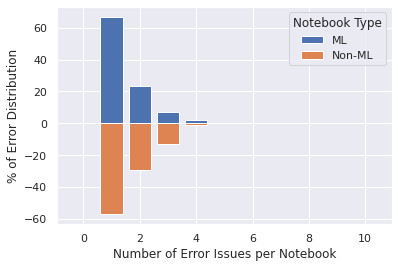

In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# sns.set(style='whitegrid')
sns.set(style='white')
sns.set(font_scale=1)

issue_catagory = "E"

data = {
    'issueCount': np.array(range(0,11,1)),
    'ML': g_e_ml,
    'Non-ML': g_e_nonml
}

df = pd.DataFrame(data)
print(df)

#now stacking it
df2 = pd.melt(df, id_vars ='issueCount', var_name='Notebook Type', value_name='change in the output' )

fig, ax = plt.subplots()
for typ, df in zip(df2['Notebook Type'].unique(),df2.groupby('Notebook Type')):
    # ax.barh(df[1]['issueCount'], df[1]['change in the output'], height=0.3, label=typ)
    ax.bar(df[1]['issueCount'], df[1]['change in the output'], label=typ)
ax.legend(title = 'Notebook Type')  

if issue_catagory=="E":
    ax.set_xlabel("Number of Error Issues per Notebook")
    ax.set_ylabel("% of Error Distribution") 
    fig.savefig("cat_error_bar.pdf", format="pdf", bbox_inches="tight")
elif issue_catagory=="C":
    ax.set_xlabel("Number of Convention Issues per Notebook")
    ax.set_ylabel("% of Convention Distribution") 
    fig.savefig("cat_convention_bar.pdf", format="pdf", bbox_inches="tight")
elif issue_catagory=="W":
    ax.set_xlabel("Number of Warning Issues per Notebook")
    ax.set_ylabel("% of Warning Distribution") 
    fig.savefig("cat_warning_bar.pdf", format="pdf", bbox_inches="tight")
elif issue_catagory=="R":
    ax.set_xlabel("Number of Refactoring Issues per Notebook")
    ax.set_ylabel("% of Refactoring Distribution") 
    fig.savefig("cat_refactoring_bar.pdf", format="pdf", bbox_inches="tight")

# plt.show()

In [110]:
style_issue_ml_filename = style_issue_for_graph[style_issue_for_graph["NB_Type"]=="ML"][["Filename", "NB_Type"]].copy().drop_duplicates(subset="Filename")
style_issue_nonml_filename = style_issue_for_graph[style_issue_for_graph["NB_Type"]=="Non-ML"][["Filename", "NB_Type"]].copy().drop_duplicates(subset="Filename")

In [342]:
style_issue_nonml_filename

,Filename,NB_Type
171907,nb_data/part_7/KT_dataset/latoadeoye_update-co...,Non-ML
171908,nb_data/part_2/KT_dataset/vinaykumar2491_imfla...,Non-ML
171909,nb_data/part_5/KT_dataset/mohamedyassinebouiba...,Non-ML
171910,nb_data/part_2/KT_dataset/vstozhkov_learn-the-...,Non-ML
171911,nb_data/part_3/KT_dataset/karslio_home-credit....,Non-ML
...,...,...
457474,nb_data/part_0/KT_dataset/andrewcrab_notebook7...,Non-ML
457475,nb_data/part_3/KT_dataset/krjamies_notebooke89...,Non-ML
457477,nb_data/part_0/KT_dataset/sengzhaotoo_notebook...,Non-ML
457478,nb_data/part_9/KT_dataset/romulorallye_kernel9...,Non-ML


In [142]:
style_issue_for_graph_v2_e_ml = style_issue_for_graph_e_ml[["Filename", "Frequency"]].copy()
style_issue_for_graph_v2_e_nonml = style_issue_for_graph_e_nonml[["Filename", "Frequency"]].copy()

style_issue_for_graph_v2_c_ml = style_issue_for_graph_c_ml[["Filename", "Frequency"]].copy()
style_issue_for_graph_v2_c_nonml = style_issue_for_graph_c_nonml[["Filename", "Frequency"]].copy()

style_issue_for_graph_v2_w_ml = style_issue_for_graph_w_ml[["Filename", "Frequency"]].copy()
style_issue_for_graph_v2_w_nonml = style_issue_for_graph_w_nonml[["Filename", "Frequency"]].copy()

style_issue_for_graph_v2_r_ml = style_issue_for_graph_r_ml[["Filename", "Frequency"]].copy()
style_issue_for_graph_v2_r_nonml = style_issue_for_graph_r_nonml[["Filename", "Frequency"]].copy()


In [144]:
style_issue_for_graph_v2_c_nonml

,Filename,Frequency
388267,nb_data/part_1/KT_dataset/orionpax00_covid-19-...,22
388268,nb_data/part_1/KT_dataset/salvadorfandio_sirwh...,22
388269,nb_data/part_1/KT_dataset/jvpeluso_nyc-airbnb-...,16
388270,nb_data/part_1/KT_dataset/praveentn_quantum-te...,16
388271,nb_data/part_2/KT_dataset/frlemarchand_maskrcn...,15
...,...,...
457476,nb_data/part_5/KT_dataset/cororonn_kernel38feb...,1
457477,nb_data/part_0/KT_dataset/sengzhaotoo_notebook...,1
457478,nb_data/part_9/KT_dataset/romulorallye_kernel9...,1
457479,nb_data/part_0/KT_dataset/andrewdeleon_noteboo...,1


In [145]:
style_issue_e_ml_join = style_issue_for_graph_v2_e_ml.merge(style_issue_ml_filename, how='outer').fillna(0)
style_issue_e_nonml_join = style_issue_for_graph_v2_e_nonml.merge(style_issue_nonml_filename, how='outer').fillna(0)

style_issue_c_ml_join = style_issue_for_graph_v2_c_ml.merge(style_issue_ml_filename, how='outer').fillna(0)
style_issue_c_nonml_join = style_issue_for_graph_v2_c_nonml.merge(style_issue_nonml_filename, how='outer').fillna(0)

style_issue_w_ml_join = style_issue_for_graph_v2_w_ml.merge(style_issue_ml_filename, how='outer').fillna(0)
style_issue_w_nonml_join = style_issue_for_graph_v2_w_nonml.merge(style_issue_nonml_filename, how='outer').fillna(0)

style_issue_r_ml_join = style_issue_for_graph_v2_r_ml.merge(style_issue_ml_filename, how='outer').fillna(0)
style_issue_r_nonml_join = style_issue_for_graph_v2_r_nonml.merge(style_issue_nonml_filename, how='outer').fillna(0)


In [181]:
graph_e_ml_10_v2 = style_issue_e_ml_join.Frequency.value_counts().sort_index()[:10]
graph_e_nonml_10_v2 = style_issue_e_nonml_join.Frequency.value_counts().sort_index()[:10] * -1
# to make equal size to error_ml 
graph_e_nonml_10_v2 = graph_e_nonml_10_v2.append(pd.Series([0], index=[10]))

graph_c_ml_10_v2 = style_issue_c_ml_join.Frequency.value_counts().sort_index()[:10]
graph_c_nonml_10_v2 = style_issue_c_nonml_join.Frequency.value_counts().sort_index()[:10] * -1

graph_w_ml_10_v2 = style_issue_w_ml_join.Frequency.value_counts().sort_index()[:10]
graph_w_nonml_10_v2 = style_issue_w_nonml_join.Frequency.value_counts().sort_index()[:10] * -1

graph_r_ml_10_v2 = style_issue_e_ml_join.Frequency.value_counts().sort_index()[:10]
graph_r_nonml_10_v2 = style_issue_r_nonml_join.Frequency.value_counts().sort_index()[:10] * -1

In [214]:
graph_c_nonml_10_v2

0.0        -4
1.0      -222
2.0     -2198
3.0     -6809
4.0    -13100
5.0    -15207
6.0    -12509
7.0     -8799
8.0     -5827
9.0     -2615
10.0    -1144
Name: Frequency, dtype: int64

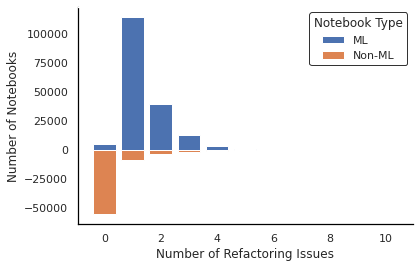

In [216]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=1)

issue_catagory = "R"

data = {
    'issueCount': np.array(range(0,11,1)),
    'ML': graph_r_ml_10_v2.to_numpy(),
    'Non-ML': graph_r_nonml_10_v2.to_numpy()
}
    
    
df = pd.DataFrame(data)

#now stacking it
df2 = pd.melt(df, id_vars ='issueCount', var_name='Notebook Type', value_name='change in the output' )

fig, ax = plt.subplots()
plt.grid(False)
ax.patch.set_facecolor('white')
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black')

for typ, df in zip(df2['Notebook Type'].unique(),df2.groupby('Notebook Type')):
    # ax.barh(df[1]['issueCount'], df[1]['change in the output'], height=0.3, label=typ)
    ax.bar(df[1]['issueCount'], df[1]['change in the output'], label=typ)
ax.legend(title = 'Notebook Type', facecolor="white", edgecolor="black")  

if issue_catagory=="E":
    ax.set_xlabel("Number of Error Issues ")
    ax.set_ylabel("Number of Notebooks") 
    fig.savefig("cat_error_bar_v2.pdf", format="pdf", bbox_inches="tight")
elif issue_catagory=="C":
    ax.set_xlabel("Number of Convention Issues ")
    ax.set_ylabel("Number of Notebooks") 
    fig.savefig("cat_convention_bar_v2.pdf", format="pdf", bbox_inches="tight")
elif issue_catagory=="W":
    ax.set_xlabel("Number of Warning Issues ")
    ax.set_ylabel("Number of Notebooks") 
    fig.savefig("cat_warning_bar_v2.pdf", format="pdf", bbox_inches="tight")
elif issue_catagory=="R":
    ax.set_xlabel("Number of Refactoring Issues")
    ax.set_ylabel("Number of Notebooks") 
    fig.savefig("cat_refactoring_bar_v2.pdf", format="pdf", bbox_inches="tight")

# plt.show()

In [516]:
df_data_desc_g = pd.read_csv("nb_dataset_loc_sloc.csv")
df_data_desc_g

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Filename,loc,sloc,type,logloc,logsloc
0,0,0,0,kerneler_starter-chicago-sex-offenders-e8744bf...,169,87,ml,5.129899,4.465908
1,1,1,1,turksoyomer_deep-learning-methods-on-malaria-c...,304,134,ml,5.717028,4.897840
2,2,2,2,thomascong_dirnet.py,608,388,ml,6.410175,5.961005
3,3,3,3,discdiver_testing-prophet-for-time-series-pred...,590,143,non-ml,6.380123,4.962845
4,4,4,4,ritayandhara_lin-regression-class-fromscratch.py,170,74,ml,5.135798,4.304065
...,...,...,...,...,...,...,...,...,...
242359,242359,242359,242359,kerneler_starter-modified-arabic-handwritten-6...,106,59,ml,4.663439,4.077537
242360,242360,242360,242360,anshulkataria_exercise-underfitting-and-overfi...,131,32,ml,4.875197,3.465736
242361,242361,242361,242361,ratamjose_a-complete-m5-exploratory-data-analy...,888,586,non-ml,6.788972,6.373320
242362,242362,242362,242362,jefffan27_911-calls-exploratory-data-analysis.py,362,55,non-ml,5.891644,4.007333


In [716]:
df_data_desc_g[df_data_desc_g.Filename == 'jixunchen_lung-segmentation-and-candidate-points-generation.py']

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Filename,loc,sloc,type,logloc,logsloc
5505,5505,5505,5505,jixunchen_lung-segmentation-and-candidate-poin...,277,113,non-ml,5.624018,4.727388


In [520]:
df_data_desc_g[df_data_desc_g.type == 'ml'].sloc.median()

75.0

In [524]:
df_data_desc_g[df_data_desc_g.type == 'non-ml'].sloc.median()

43.0

In [578]:
df_data_desc_g[df_data_desc_g.type == 'ml'].sloc.value_counts()

59      17469
57       7819
68       7260
66       6647
64       2234
        ...  
2251        1
2347        1
1695        1
1755        1
1226        1
Name: sloc, Length: 1266, dtype: int64

In [341]:
df_data_desc_g.sort_values('loc')[8000:8010]

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Filename,loc,sloc,type,logloc,logsloc
59370,59370,59370,59370,sudhendu_google-mobility-data.py,42,9,non-ml,3.73767,2.197225
92841,92841,92841,92841,dariapetrenko_notebook24174439dc.py,42,8,non-ml,3.73767,2.079442
113736,113736,113736,113736,levinh_shopeecodeleague-2020-fight-code.py,42,13,non-ml,3.73767,2.564949
120323,120323,120323,120323,hashem039_hm-dr-aptos.py,42,10,non-ml,3.73767,2.302585
44414,44414,44414,44414,mariasandalwala_50-events-cancelled-or-postpon...,42,23,non-ml,3.73767,3.135494
104834,104834,104834,104834,adithyavenkatesh_diabetes-predictor.py,42,27,ml,3.73767,3.295837
15773,15773,15773,15773,ifeomao_5-day-data-challenge-day-2-py-using-se...,42,9,non-ml,3.73767,2.197225
162331,162331,162331,162331,pararols_getting-meteo-data-and-create-a-csv-i...,42,9,non-ml,3.73767,2.197225
48615,48615,48615,48615,rsa0123_misnt-numbers.py,42,7,ml,3.73767,1.945910
241943,241943,241943,241943,neopy1_notebook95c3166aef.py,42,9,non-ml,3.73767,2.197225


In [334]:
df_data_desc_g[df_data_desc_g.Filename == 'atauma_grouping-and-sorting.py']

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Filename,loc,sloc,type,logloc,logsloc


In [ ]:
fig = sns.violinplot(data=df_dataset_description, x="logsloc", y="type", cut=0)
fig.set(xlabel='Log of LOC per Notebook', ylabel='Notebook Type')

fig.figure.savefig('sloc_bean.pdf', bbox_inches="tight")
fig.figure.show()

In [2094]:
quick_check = df_indv_issue_all2[df_indv_issue_all2.Code.str.startswith('E')]
(quick_check[quick_check.Code=='E1130'].Frequency.sum() / quick_check.Frequency.sum() ) * 100

0.03627272955614295

In [2116]:
def _deffernce_check():
    df_issue_freq_all = pd.read_sql_query("SELECT * from issueFrewquency", conn)
    df_issue_freq_all

    for issue_first_letter in ['E', 'C', 'W', 'R']: 
        df_issue_cat_2 = df_issue_freq_all[df_issue_freq_all.Code.str.startswith(issue_first_letter)]
        df_issue_cat_2_ml = df_issue_cat_2[df_issue_cat_2.Type == 'ml']
        df_issue_cat_2_nonml = df_issue_cat_2[df_issue_cat_2.Type == 'nonml']

        all_issue_code_2 = df_issue_cat_2.Code.unique()

        issue_valuecount_ml_2 = df_issue_cat_2_ml.Code.value_counts()
        issue_valuecount_nonml_2 = df_issue_cat_2_nonml.Code.value_counts()

        code_list_chi, ml_list_chi, nonml_list_chi = [], [], []

        # code wise issue frequency count 
        for code in all_issue_code_2:
            code_list_chi.append(code)

            if code in issue_valuecount_ml_2.index:
                ml_list_chi.append(issue_valuecount_ml_2[code])
            else:
                ml_list_chi.append(0)


            if code in issue_valuecount_nonml_2.index:
                nonml_list_chi.append(issue_valuecount_nonml_2[code])
            else:
                nonml_list_chi.append(0)

        # Difference check
        diff = np.array(ml_list_chi) - np.array(nonml_list_chi)
        print(issue_first_letter, len(ml_list_chi), np.sum(np.absolute(diff)))


In [ ]:
_deffernce_check()

E 66 190544
C 38 881732
W 90 411409
R 51 68354


In [2111]:
import numpy as np
a = np.array([2,4,6,8])
b = np.array([1,6,5,7])
c = a-b
print (np.absolute(c))

[1 2 1 1]


In [242]:
df_r = df_indv_issue_all2[df_indv_issue_all2.Code == 'R1725']
df_r.sort_values(by=['Frequency'])

,Filename,Code,Frequency,Type
2773963,nb_data/part_9/KT_dataset/peaceagent_resnext10...,R1725,1,ml
1182261,nb_data/part_5/KT_dataset/matheuseduardo_anime...,R1725,1,ml
1183066,nb_data/part_5/KT_dataset/frederikolsen_delhi-...,R1725,1,ml
1183437,nb_data/part_5/KT_dataset/matveich19_blending-...,R1725,1,ml
2136997,nb_data/part_7/KT_dataset/klimovich_cat-vs-dog...,R1725,1,ml
...,...,...,...,...
353718,nb_data/part_2/KT_dataset/derure_future-base-4...,R1725,22,ml
1397226,nb_data/part_0/KT_dataset/ssfailearning_future...,R1725,22,ml
774890,nb_data/part_3/KT_dataset/liuchuanloong_airbus...,R1725,22,ml
1409120,nb_data/part_0/KT_dataset/ssf0921_future-base....,R1725,22,ml


In [2015]:
df_indv_issue_all2 = pd.read_sql_query("SELECT * from issueFrewquency", conn)
df_indv_issue_all2


,Filename,Code,Frequency,Type
0,nb_data/part_1/KT_dataset/jixunchen_lung-segme...,C0303,18,nonml
1,nb_data/part_1/KT_dataset/jixunchen_lung-segme...,W0611,15,nonml
2,nb_data/part_1/KT_dataset/jixunchen_lung-segme...,C0121,9,nonml
3,nb_data/part_1/KT_dataset/jixunchen_lung-segme...,E0401,9,nonml
4,nb_data/part_1/KT_dataset/jixunchen_lung-segme...,W0105,8,nonml
...,...,...,...,...
2773971,nb_data/part_9/KT_dataset/kerneler_starter-rou...,E0401,1,ml
2773972,nb_data/part_9/KT_dataset/kerneler_starter-rou...,W0612,1,ml
2773973,nb_data/part_9/KT_dataset/kerneler_starter-rou...,W0621,1,ml
2773974,nb_data/part_9/KT_dataset/kerneler_starter-rou...,C0209,1,ml


In [2068]:
df_indv_issue_all2[df_indv_issue_all2.Type=='ml'].Filename.nunique()

177010

In [2085]:
issue_category_firstletter = ['E', 'C', 'W', 'R'][0]
df_issue_graph_ml = df_indv_issue_all2[df_indv_issue_all2.Code.str.startswith(issue_category_firstletter)]
df_issue_graph_ml = df_issue_graph_ml[df_issue_graph_ml.Type == 'ml']

df_issue_graph_nonml = df_indv_issue_all2[df_indv_issue_all2.Code.str.startswith(issue_category_firstletter)]
df_issue_graph_nonml = df_issue_graph_nonml[df_issue_graph_nonml.Type == 'nonml']

df_issue_graph_ml

,Filename,Code,Frequency,Type
28,nb_data/part_1/KT_dataset/kerneler_starter-new...,E0401,1,ml
34,nb_data/part_1/KT_dataset/dengjingyuan_simple-...,E0401,2,ml
35,nb_data/part_1/KT_dataset/dengjingyuan_simple-...,E1121,2,ml
55,nb_data/part_1/KT_dataset/poojanagure_biginer-...,E0602,13,ml
58,nb_data/part_1/KT_dataset/poojanagure_biginer-...,E0401,6,ml
...,...,...,...,...
2773926,nb_data/part_9/KT_dataset/aerrkhis_titanic-cha...,E0401,4,ml
2773940,nb_data/part_9/KT_dataset/peaceagent_resnext10...,E1101,15,ml
2773955,nb_data/part_9/KT_dataset/peaceagent_resnext10...,E0602,2,ml
2773957,nb_data/part_9/KT_dataset/peaceagent_resnext10...,E0401,2,ml


In [2074]:
seris_groupby_graph_ml = df_issue_graph_ml.groupby('Filename')['Frequency'].sum().sort_values(ascending=False)
seris_groupby_graph_nonml = df_issue_graph_nonml.groupby('Filename')['Frequency'].sum().sort_values(ascending=False)
seris_all_file_list = df_indv_issue_all2.Filename.unique()

In [2065]:
def _check_zero_issue_of_notebooks(df_filename_frequency, notebook_type):
    df_indv_issue = pd.read_sql_query("SELECT * from issueFrewquency", conn)
    df_indv_issue = df_indv_issue[df_indv_issue.Type == notebook_type]
    all_filenames = df_indv_issue.Filename.unique()
    
    new_issue_freq_list = []
    
    for filename in all_filenames:
        if filename in df_filename_frequency.index:
            new_issue_freq_list.append(df_filename_frequency[filename])
        else:
            new_issue_freq_list.append(0)
            
    data = pd.DataFrame({'Filename': all_filenames, 'Frequency':new_issue_freq_list})
    return data

In [2079]:
ml_data_frequency = _check_zero_issue_of_notebooks(seris_groupby_graph_ml, 'ml')
nonml_data_frequency = _check_zero_issue_of_notebooks(seris_groupby_graph_nonml, 'nonml')
print('Issue Category ', issue_category_firstletter)
nonml_data_frequency

E


,Filename,Frequency
0,nb_data/part_1/KT_dataset/jixunchen_lung-segme...,44
1,nb_data/part_1/KT_dataset/pdthomsen_learn-pyth...,23
2,nb_data/part_1/KT_dataset/svrcek_analyzing-soc...,40
3,nb_data/part_1/KT_dataset/mihirahuja01_meta-fe...,47
4,nb_data/part_1/KT_dataset/koneand_notebook12d8...,4
...,...,...
69213,nb_data/part_9/KT_dataset/mahdialmamlouk_exerc...,16
69214,nb_data/part_9/KT_dataset/hungnd11_data-cleani...,14
69215,nb_data/part_9/KT_dataset/econdata_exercise-li...,15
69216,nb_data/part_9/KT_dataset/gemzhx_test1.ipynb,4


In [2080]:
ml_data_frequency.Frequency.value_counts().sort_values(ascending=False)

36      22399
38       8384
37       5735
39       3634
44       3504
        ...  
679         1
451         1
2108        1
1324        1
575         1
Name: Frequency, Length: 565, dtype: int64

In [2081]:
nonml_data_frequency.Frequency.value_counts().sort_values(ascending=False)

4      5153
5      5045
7      4551
6      3933
8      3604
       ... 
458       1
266       1
295       1
274       1
422       1
Name: Frequency, Length: 401, dtype: int64

In [2040]:
df_indv_issue_all2[df_indv_issue_all2.Filename == 'nb_data/part_5/KT_dataset/ramazangebece_energy-of-molecules.ipynb']

,Filename,Code,Frequency,Type
1254783,nb_data/part_5/KT_dataset/ramazangebece_energy...,C0303,9900,ml
1254784,nb_data/part_5/KT_dataset/ramazangebece_energy...,E0401,4,ml
1254785,nb_data/part_5/KT_dataset/ramazangebece_energy...,C0413,4,ml
1254786,nb_data/part_5/KT_dataset/ramazangebece_energy...,C0301,3,ml
1254787,nb_data/part_5/KT_dataset/ramazangebece_energy...,W0104,3,ml
1254788,nb_data/part_5/KT_dataset/ramazangebece_energy...,C0302,1,ml
1254789,nb_data/part_5/KT_dataset/ramazangebece_energy...,C0114,1,ml
1254790,nb_data/part_5/KT_dataset/ramazangebece_energy...,C0103,1,ml
1254791,nb_data/part_5/KT_dataset/ramazangebece_energy...,W0106,1,ml
1254792,nb_data/part_5/KT_dataset/ramazangebece_energy...,C0411,1,ml


In [1001]:
style_issue_c_ml_join_v2[style_issue_c_ml_join_v2.Frequency == 35]

,Filename,Frequency,NB_Type
101,nb_data/part_0/KT_dataset/abdulwaheedsoudagar_...,35.0,ML
182,nb_data/part_0/KT_dataset/abhisheksss_home-cre...,35.0,ML
419,nb_data/part_0/KT_dataset/ahmedtawfeek604_pred...,35.0,ML
554,nb_data/part_0/KT_dataset/akoeppl_titanic-with...,35.0,ML
621,nb_data/part_0/KT_dataset/alcheng10_pokemon-co...,35.0,ML
...,...,...,...
176554,nb_data/part_9/KT_dataset/wsmalta_estatistica-...,35.0,ML
176669,nb_data/part_9/KT_dataset/yashaswivunnava_hous...,35.0,ML
176806,nb_data/part_9/KT_dataset/yukia18_bert-feature...,35.0,ML
176905,nb_data/part_9/KT_dataset/zerryberry_top-10-in...,35.0,ML


In [1004]:
for index, row in style_issue_c_ml_join_v2[style_issue_c_ml_join_v2.Frequency == 36][:15].iterrows():
    print(row['Filename'], row['Frequency'])

nb_data/part_0/KT_dataset/aadiuppal_analyzing-fake-news-using-random-forest.ipynb 36.0
nb_data/part_0/KT_dataset/aakashg1999_sumit-final.ipynb 36.0
nb_data/part_0/KT_dataset/ab12340987_starter-health-minister-s-cancer-4e448024-1.ipynb 36.0
nb_data/part_0/KT_dataset/abdelrahmangamil_rose-gonna-survive.ipynb 36.0
nb_data/part_0/KT_dataset/abeserra_modelos-base-pmf-svr-x-horas.ipynb 36.0
nb_data/part_0/KT_dataset/abhikbr_kernel7d4c6dfd23.ipynb 36.0
nb_data/part_0/KT_dataset/addidas23_starter-yelp-dataset-30682d09-6.ipynb 36.0
nb_data/part_0/KT_dataset/adeyoyintemidayo_stock-data-eda-and-prediction.ipynb 36.0
nb_data/part_0/KT_dataset/adrian1acoran_starter-resnet-34-3d7d6235-2.ipynb 36.0
nb_data/part_0/KT_dataset/agajorte_iris-classification-using-13-algorithms-in-python.ipynb 36.0
nb_data/part_0/KT_dataset/agarwalsourabh55_janatahack-cross-sell-prediction.ipynb 36.0
nb_data/part_0/KT_dataset/akashs2021_using-pytorch-for-beginners.ipynb 36.0
nb_data/part_0/KT_dataset/akhdar_starter-world-b

In [1002]:
for index, row in style_issue_c_ml_join_v2[style_issue_c_ml_join_v2.Frequency == 35][:15].iterrows():
    print(row['Filename'], row['Frequency'])

nb_data/part_0/KT_dataset/abdulwaheedsoudagar_vehicle-insurance-eda-auc-79.ipynb 35.0
nb_data/part_0/KT_dataset/abhisheksss_home-credit-riskkk.ipynb 35.0
nb_data/part_0/KT_dataset/ahmedtawfeek604_predict-house-sales-using-xgbregressor.ipynb 35.0
nb_data/part_0/KT_dataset/akoeppl_titanic-with-tensorflow.ipynb 35.0
nb_data/part_0/KT_dataset/alcheng10_pokemon-comparison-between-nn-and-rf.ipynb 35.0
nb_data/part_0/KT_dataset/alexfuster_solving-the-problem-the-complete-process.ipynb 35.0
nb_data/part_0/KT_dataset/allysonlm_allysonlm-comp-junho-2019.ipynb 35.0
nb_data/part_0/KT_dataset/alphazanno_exercise-categorical-variables.ipynb 35.0
nb_data/part_0/KT_dataset/ankita56_movie-recommendation.ipynb 35.0
nb_data/part_0/KT_dataset/ankitarafiz_likelihood-of-esigning-loan-basedonfinacialhistory.ipynb 35.0
nb_data/part_0/KT_dataset/anuragbantu_target-encoding-beginner-s-guide.ipynb 35.0
nb_data/part_0/KT_dataset/arielrios_hcde-530-a3.ipynb 35.0
nb_data/part_0/KT_dataset/ashishlepcha_semantic-text

In [1016]:
df_issue_freq_ml_c[df_issue_freq_ml_c.Filename == 'nb_data/part_0/KT_dataset/asraf047_ecg3-cnn.ipynb']

,Filename,Code,Frequency,Type
1398041,nb_data/part_0/KT_dataset/asraf047_ecg3-cnn.ipynb,C0303,8,ml
1398042,nb_data/part_0/KT_dataset/asraf047_ecg3-cnn.ipynb,C0103,8,ml
1398044,nb_data/part_0/KT_dataset/asraf047_ecg3-cnn.ipynb,C0413,6,ml
1398045,nb_data/part_0/KT_dataset/asraf047_ecg3-cnn.ipynb,C0412,6,ml
1398046,nb_data/part_0/KT_dataset/asraf047_ecg3-cnn.ipynb,C0411,5,ml
1398048,nb_data/part_0/KT_dataset/asraf047_ecg3-cnn.ipynb,C0301,1,ml
1398049,nb_data/part_0/KT_dataset/asraf047_ecg3-cnn.ipynb,C0114,1,ml


In [1005]:
df_issue_freq_ml_c[df_issue_freq_ml_c.Filename == 'nb_data/part_0/KT_dataset/aakashg1999_sumit-final.ipynb']

,Filename,Code,Frequency,Type
1543938,nb_data/part_0/KT_dataset/aakashg1999_sumit-fi...,C0303,21,ml
1543941,nb_data/part_0/KT_dataset/aakashg1999_sumit-fi...,C0103,8,ml
1543943,nb_data/part_0/KT_dataset/aakashg1999_sumit-fi...,C0116,4,ml
1543947,nb_data/part_0/KT_dataset/aakashg1999_sumit-fi...,C0114,1,ml
1543949,nb_data/part_0/KT_dataset/aakashg1999_sumit-fi...,C0115,1,ml
1543951,nb_data/part_0/KT_dataset/aakashg1999_sumit-fi...,C0411,1,ml


In [837]:
df_issue_freq_ml_c[df_issue_freq_ml_c.Filename == 'nb_data/part_0/KT_dataset/ab12340987_starter-health-minister-s-cancer-4e448024-1.ipynb']

,Filename,Code,Frequency,Type
1512409,nb_data/part_0/KT_dataset/ab12340987_starter-h...,C0103,22,ml
1512410,nb_data/part_0/KT_dataset/ab12340987_starter-h...,C0301,7,ml
1512411,nb_data/part_0/KT_dataset/ab12340987_starter-h...,C0116,3,ml
1512413,nb_data/part_0/KT_dataset/ab12340987_starter-h...,C0325,1,ml
1512414,nb_data/part_0/KT_dataset/ab12340987_starter-h...,C0114,1,ml
1512418,nb_data/part_0/KT_dataset/ab12340987_starter-h...,C0209,1,ml
1512419,nb_data/part_0/KT_dataset/ab12340987_starter-h...,C0411,1,ml


In [838]:
df_issue_freq_ml_c[df_issue_freq_ml_c.Filename == 'nb_data/part_9/KT_dataset/zainabsajid_starter-who-national-immunization-47016ae8-3.ipynb']

,Filename,Code,Frequency,Type
2547406,nb_data/part_9/KT_dataset/zainabsajid_starter-...,C0103,22,ml
2547407,nb_data/part_9/KT_dataset/zainabsajid_starter-...,C0301,7,ml
2547408,nb_data/part_9/KT_dataset/zainabsajid_starter-...,C0116,3,ml
2547410,nb_data/part_9/KT_dataset/zainabsajid_starter-...,C0325,1,ml
2547411,nb_data/part_9/KT_dataset/zainabsajid_starter-...,C0114,1,ml
2547415,nb_data/part_9/KT_dataset/zainabsajid_starter-...,C0209,1,ml
2547416,nb_data/part_9/KT_dataset/zainabsajid_starter-...,C0411,1,ml


In [840]:
df_issue_freq_ml_c[df_issue_freq_ml_c.Filename == 'nb_data/part_9/KT_dataset/wsmalta_estatistica-iii-agora-vai-mesmo.ipynb']

,Filename,Code,Frequency,Type
2509178,nb_data/part_9/KT_dataset/wsmalta_estatistica-...,C0303,13,ml
2509179,nb_data/part_9/KT_dataset/wsmalta_estatistica-...,C0301,12,ml
2509181,nb_data/part_9/KT_dataset/wsmalta_estatistica-...,C0209,3,ml
2509183,nb_data/part_9/KT_dataset/wsmalta_estatistica-...,C0412,2,ml
2509184,nb_data/part_9/KT_dataset/wsmalta_estatistica-...,C0114,1,ml
2509185,nb_data/part_9/KT_dataset/wsmalta_estatistica-...,C0103,1,ml
2509187,nb_data/part_9/KT_dataset/wsmalta_estatistica-...,C0413,1,ml
2509188,nb_data/part_9/KT_dataset/wsmalta_estatistica-...,C0116,1,ml
2509189,nb_data/part_9/KT_dataset/wsmalta_estatistica-...,C0411,1,ml


In [842]:
style_issue_e_nonml_join_v2.Frequency.median()

1.0

In [1040]:
conv_0to35 = style_issue_c_ml_join_v2[style_issue_c_ml_join_v2.Frequency.between(0, 35)]
conv_36 = style_issue_c_ml_join_v2[style_issue_c_ml_join_v2.Frequency.between(36, 36)]
conv_37 = style_issue_c_ml_join_v2[style_issue_c_ml_join_v2.Frequency.between(37, 37)]

In [1024]:
conv_0to35

,Filename,Frequency,NB_Type
0,nb_data/part_0/KT_dataset/a03102030_regression...,32.0,ML
1,nb_data/part_0/KT_dataset/a03102030_using-cnn-...,18.0,ML
5,nb_data/part_0/KT_dataset/a25ritwikpal_a-25-ri...,10.0,ML
6,nb_data/part_0/KT_dataset/a27saptarshimondal_a...,16.0,ML
9,nb_data/part_0/KT_dataset/a57nilabhraadhikari_...,4.0,ML
...,...,...,...
176997,nb_data/part_9/KT_dataset/zwzzhong_hw2-nba-pla...,12.0,ML
177001,nb_data/part_9/KT_dataset/zz1994_a-journey-thr...,20.0,ML
177002,nb_data/part_9/KT_dataset/zzero0_applying-logi...,17.0,ML
177004,nb_data/part_5/KT_dataset/davorbudimir_titanic...,0.0,ML


In [1032]:
conv_36

,Filename,Frequency,NB_Type
26,nb_data/part_0/KT_dataset/aadiuppal_analyzing-...,36.0,ML
32,nb_data/part_0/KT_dataset/aakashg1999_sumit-fi...,36.0,ML
66,nb_data/part_0/KT_dataset/ab12340987_starter-h...,36.0,ML
87,nb_data/part_0/KT_dataset/abdelrahmangamil_ros...,36.0,ML
115,nb_data/part_0/KT_dataset/abeserra_modelos-bas...,36.0,ML
...,...,...,...
176869,nb_data/part_9/KT_dataset/zainabsajid_starter-...,36.0,ML
176877,nb_data/part_9/KT_dataset/zaki1001_starter-che...,36.0,ML
176922,nb_data/part_9/KT_dataset/zhengyuandonshen_ker...,36.0,ML
176958,nb_data/part_9/KT_dataset/zj8850_starter-news-...,36.0,ML


In [1025]:
df_issue_freq_ml_c

,Filename,Code,Frequency,Type
20,nb_data/part_1/KT_dataset/kerneler_starter-new...,C0103,25,ml
21,nb_data/part_1/KT_dataset/kerneler_starter-new...,C0301,13,ml
22,nb_data/part_1/KT_dataset/kerneler_starter-new...,C0327,9,ml
23,nb_data/part_1/KT_dataset/kerneler_starter-new...,C0116,3,ml
26,nb_data/part_1/KT_dataset/kerneler_starter-new...,C0325,1,ml
...,...,...,...,...
2773967,nb_data/part_9/KT_dataset/kerneler_starter-rou...,C0116,3,ml
2773969,nb_data/part_9/KT_dataset/kerneler_starter-rou...,C0325,1,ml
2773970,nb_data/part_9/KT_dataset/kerneler_starter-rou...,C0114,1,ml
2773974,nb_data/part_9/KT_dataset/kerneler_starter-rou...,C0209,1,ml


In [1041]:
conv_0to35_join = conv_0to35.merge(df_issue_freq_ml_c, on=['Filename'], how='left')
conv_36_join = conv_36.merge(df_issue_freq_ml_c, on=['Filename'], how='left')
conv_37_join = conv_37.merge(df_issue_freq_ml_c, on=['Filename'], how='left')


In [1042]:
conv_37_join.Filename.nunique()

5735

In [1039]:
conv_0to35_join.groupby('Code')['Frequency_y'].sum().sort_values(ascending=False)

Code
C0413    360679.0
C0303    261041.0
C0103    214239.0
C0301    208351.0
C0114     77675.0
C0411     71961.0
C0116     52027.0
C0209     50746.0
C0412     41454.0
C0325      5872.0
C0200      4993.0
C0321      4156.0
C0121      2799.0
C0115      2654.0
C0410      1302.0
C3001       833.0
C0415       758.0
C0123       593.0
C0206       576.0
C0201       426.0
C0414       368.0
C0207       279.0
C2401       156.0
C2801       140.0
C0104        41.0
C1802        33.0
C0113        31.0
C0327        26.0
C0302        25.0
C1803         9.0
C0208         7.0
C0112         6.0
C3002         3.0
C0305         2.0
Name: Frequency_y, dtype: float64

In [1037]:
conv_36_join.groupby('Code')['Frequency_y'].sum().sort_values(ascending=False)

Code
C0103    470655
C0301    154738
C0116     65634
C0411     23291
C0209     23025
C0114     22399
C0325     21318
C0413     12009
C0303     10793
C0412      1685
C0321       191
C0200       172
C0115       138
C0121       104
C0410        49
C3001        34
C0206        29
C0201        29
C0415        26
C0123        20
C2401        12
C0414         6
C2801         4
C0302         2
C1803         1
Name: Frequency_y, dtype: int64

In [1043]:
conv_37_join.groupby('Code')['Frequency_y'].sum().sort_values(ascending=False)

Code
C0103    111487
C0301     38663
C0116     15854
C0413     10786
C0303      9277
C0411      6646
C0209      6446
C0114      5726
C0325      4852
C0412      1572
C0321       180
C0200       166
C0121       147
C0115       128
C0206        49
C0410        49
C0201        38
C0415        29
C0123        23
C0207        16
C3001        16
C2401        16
C0113         9
C0414         6
C1803         3
C2801         3
C3002         2
C1802         2
C0104         2
C0112         1
C0302         1
Name: Frequency_y, dtype: int64

In [226]:
df_indv_issue_all2 = pd.read_sql_query("SELECT * from issueFrewquency", conn)
df_indv_issue_all2

,Filename,Code,Frequency,Type
0,nb_data/part_1/KT_dataset/jixunchen_lung-segme...,C0303,18,nonml
1,nb_data/part_1/KT_dataset/jixunchen_lung-segme...,W0611,15,nonml
2,nb_data/part_1/KT_dataset/jixunchen_lung-segme...,C0121,9,nonml
3,nb_data/part_1/KT_dataset/jixunchen_lung-segme...,E0401,9,nonml
4,nb_data/part_1/KT_dataset/jixunchen_lung-segme...,W0105,8,nonml
...,...,...,...,...
2773971,nb_data/part_9/KT_dataset/kerneler_starter-rou...,E0401,1,ml
2773972,nb_data/part_9/KT_dataset/kerneler_starter-rou...,W0612,1,ml
2773973,nb_data/part_9/KT_dataset/kerneler_starter-rou...,W0621,1,ml
2773974,nb_data/part_9/KT_dataset/kerneler_starter-rou...,C0209,1,ml


In [233]:
df_indv_issue_all2_c = df_indv_issue_all2[df_indv_issue_all2.Code.str.startswith('C')]

df_issue_freq_nonml_c = df_indv_issue_all2_c[df_indv_issue_all2_c.Type == 'nonml']
df_issue_freq_ml_c = df_indv_issue_all2_c[df_indv_issue_all2_c.Type == 'ml']
df_issue_freq_ml_c

,Filename,Code,Frequency,Type
20,nb_data/part_1/KT_dataset/kerneler_starter-new...,C0103,25,ml
21,nb_data/part_1/KT_dataset/kerneler_starter-new...,C0301,13,ml
22,nb_data/part_1/KT_dataset/kerneler_starter-new...,C0327,9,ml
23,nb_data/part_1/KT_dataset/kerneler_starter-new...,C0116,3,ml
26,nb_data/part_1/KT_dataset/kerneler_starter-new...,C0325,1,ml
...,...,...,...,...
2773967,nb_data/part_9/KT_dataset/kerneler_starter-rou...,C0116,3,ml
2773969,nb_data/part_9/KT_dataset/kerneler_starter-rou...,C0325,1,ml
2773970,nb_data/part_9/KT_dataset/kerneler_starter-rou...,C0114,1,ml
2773974,nb_data/part_9/KT_dataset/kerneler_starter-rou...,C0209,1,ml


In [968]:
df_issue_freq_nonml_c

,Filename,Code,Frequency,Type
0,nb_data/part_1/KT_dataset/jixunchen_lung-segme...,C0303,18,nonml
2,nb_data/part_1/KT_dataset/jixunchen_lung-segme...,C0121,9,nonml
5,nb_data/part_1/KT_dataset/jixunchen_lung-segme...,C0103,6,nonml
7,nb_data/part_1/KT_dataset/jixunchen_lung-segme...,C0301,4,nonml
9,nb_data/part_1/KT_dataset/jixunchen_lung-segme...,C0116,2,nonml
...,...,...,...,...
2773897,nb_data/part_9/KT_dataset/gemzhx_test1.ipynb,C0301,1,nonml
2773898,nb_data/part_9/KT_dataset/gemzhx_test1.ipynb,C0114,1,nonml
2773899,nb_data/part_9/KT_dataset/gemzhx_test1.ipynb,C0411,1,nonml
2773934,nb_data/part_9/KT_dataset/prashdash112_911-cal...,C0114,1,nonml


In [990]:
df_issue_freq_ml_c[df_issue_freq_ml_c.Code == 'C0303'].sort_values('Frequency', ascending=False)

,Filename,Code,Frequency,Type
1254783,nb_data/part_5/KT_dataset/ramazangebece_energy...,C0303,9900,ml
457553,nb_data/part_2/KT_dataset/scirpus_gp-probabili...,C0303,1538,ml
2583903,nb_data/part_9/KT_dataset/scirpus_santander-gp...,C0303,1023,ml
2134874,nb_data/part_7/KT_dataset/fabianotodao_titanic...,C0303,714,ml
1381517,nb_data/part_5/KT_dataset/kazanova_fork-of-scr...,C0303,593,ml
...,...,...,...,...
1385632,nb_data/part_5/KT_dataset/txt736_notebookcb707...,C0303,1,ml
741626,nb_data/part_3/KT_dataset/nipaanjum_deep-learn...,C0303,1,ml
2382481,nb_data/part_8/KT_dataset/serenetu_ai-camp-log...,C0303,1,ml
2029076,nb_data/part_7/KT_dataset/srimalj_investigate-...,C0303,1,ml


In [991]:
df_issue_freq_ml_c.sort_values('Frequency', ascending=False)

,Filename,Code,Frequency,Type
1254783,nb_data/part_5/KT_dataset/ramazangebece_energy...,C0303,9900,ml
859714,nb_data/part_4/KT_dataset/scirpus_fork-of-alri...,C0301,2073,ml
171360,nb_data/part_1/KT_dataset/scirpus_alright-la.i...,C0301,2073,ml
720462,nb_data/part_3/KT_dataset/scirpus_gp-lgb-hybri...,C0301,2034,ml
2188928,nb_data/part_7/KT_dataset/scirpus_complex-gp.i...,C0301,2007,ml
...,...,...,...,...
1284512,nb_data/part_5/KT_dataset/ivanbb_imput-na.ipynb,C0413,1,ml
1284513,nb_data/part_5/KT_dataset/ivanbb_imput-na.ipynb,C0116,1,ml
1284549,nb_data/part_5/KT_dataset/dstomcray_solucao-co...,C0114,1,ml
1284551,nb_data/part_5/KT_dataset/dstomcray_solucao-co...,C0116,1,ml


In [995]:
df_issue_freq_ml_c.Filename.nunique()

177004

In [996]:
df_issue_freq_nonml_c.Filename.nunique()

69214

In [239]:
d = df_issue_freq_ml_c[df_issue_freq_ml_c.Filename.str.startswith('nb_data/part_5/KT_dataset/ramazangebece_energ')]
d

,Filename,Code,Frequency,Type
1254783,nb_data/part_5/KT_dataset/ramazangebece_energy...,C0303,9900,ml
1254785,nb_data/part_5/KT_dataset/ramazangebece_energy...,C0413,4,ml
1254786,nb_data/part_5/KT_dataset/ramazangebece_energy...,C0301,3,ml
1254788,nb_data/part_5/KT_dataset/ramazangebece_energy...,C0302,1,ml
1254789,nb_data/part_5/KT_dataset/ramazangebece_energy...,C0114,1,ml
1254790,nb_data/part_5/KT_dataset/ramazangebece_energy...,C0103,1,ml
1254792,nb_data/part_5/KT_dataset/ramazangebece_energy...,C0411,1,ml


In [864]:
df_style_issues_v1 = pd.read_csv("nb_style_issue.csv")
df_style_issues_v1

,Unnamed: 0,Filename,Frequency,Issue,NB_Type
0,0,nb_data/part_2/KT_dataset/takeseven_yours-sinc...,11,Error,ML
1,1,nb_data/part_1/KT_dataset/benyamindariadi_crea...,10,Error,ML
2,2,nb_data/part_1/KT_dataset/ilialar_3rd-place-en...,10,Error,ML
3,3,nb_data/part_1/KT_dataset/latoadeoye_sales-pre...,9,Error,ML
4,4,nb_data/part_1/KT_dataset/bibhudas_cab-booking...,9,Error,ML
...,...,...,...,...,...
749042,749042,nb_data/part_5/KT_dataset/rmrouse88_japan-trad...,1,Refactoring,Non-ML
749043,749043,nb_data/part_5/KT_dataset/svhdec3_eda-on-netfl...,1,Refactoring,Non-ML
749044,749044,nb_data/part_5/KT_dataset/ihromov_basic-analys...,1,Refactoring,Non-ML
749045,749045,nb_data/part_5/KT_dataset/acoulibaly_greco-pre...,1,Refactoring,Non-ML


In [865]:
data_for_test_v1=df_style_issues_v1[df_style_issues_v1['Issue']=='Error']
data_for_test_v1

,Unnamed: 0,Filename,Frequency,Issue,NB_Type
0,0,nb_data/part_2/KT_dataset/takeseven_yours-sinc...,11,Error,ML
1,1,nb_data/part_1/KT_dataset/benyamindariadi_crea...,10,Error,ML
2,2,nb_data/part_1/KT_dataset/ilialar_3rd-place-en...,10,Error,ML
3,3,nb_data/part_1/KT_dataset/latoadeoye_sales-pre...,9,Error,ML
4,4,nb_data/part_1/KT_dataset/bibhudas_cab-booking...,9,Error,ML
...,...,...,...,...,...
211258,211258,nb_data/part_0/KT_dataset/svashishtha_new-appr...,1,Error,Non-ML
211259,211259,nb_data/part_0/KT_dataset/truelatysh_baseline....,1,Error,Non-ML
211260,211260,nb_data/part_0/KT_dataset/universalastro_young...,1,Error,Non-ML
211261,211261,nb_data/part_0/KT_dataset/liadkeller_analysis-...,1,Error,Non-ML


In [878]:
data_for_test_v1[data_for_test_v1['NB_Type']=='Non-ML'].Frequency.median()

1.0

In [866]:
group_issue_sum = data_for_test_v1[data_for_test_v1['NB_Type']=='ML']['Frequency'].sum()
total_nbtype_sum = df_style_issues_v1[df_style_issues_v1['NB_Type']=='ML']['Frequency'].sum()

print (group_issue_sum, total_nbtype_sum, group_issue_sum/total_nbtype_sum)

252074 2159994 0.11670125009606508


In [867]:
s, p = stats.mannwhitneyu(data_for_test_v1[data_for_test_v1['NB_Type']=='ML']['Frequency'], data_for_test_v1[data_for_test_v1['NB_Type']=='Non-ML']['Frequency'])
d, res = cliffs_delta( data_for_test_v1[data_for_test_v1['NB_Type']=='ML']['Frequency'], data_for_test_v1[data_for_test_v1['NB_Type']=='Non-ML']['Frequency'])

print (s, p, d, res)

3054195742.0 1.4673638254442552e-279 -0.09713597290675276 negligible


In [880]:
data_cont=pd.crosstab(data_for_test_v1[data_for_test_v1['NB_Type']=='ML']['Frequency'], data_for_test_v1[data_for_test_v1['NB_Type']=='Non-ML']['Frequency'])
data_cont

Frequency
Frequency


In [ ]:
s, p = stats.chi2_contingency()
d, res = cliffs_delta( data_for_test_v1[data_for_test_v1['NB_Type']=='ML']['Frequency'], data_for_test_v1[data_for_test_v1['NB_Type']=='Non-ML']['Frequency'])

print (s, p, d, res)

In [873]:
data_for_test_ml_v2 = style_issue_e_ml_join_v2
data_for_test_nonml_v2 = style_issue_e_nonml_join_v2


In [882]:
style_issue_e_nonml_join_v2

,Filename,Frequency,NB_Type
0,nb_data/part_0/KT_dataset/a0925053998_sql-scav...,1.0,Non-ML
1,nb_data/part_0/KT_dataset/a166013_data-cleanin...,2.0,Non-ML
2,nb_data/part_0/KT_dataset/a45632_sql-scavenger...,1.0,Non-ML
3,nb_data/part_0/KT_dataset/aaagrekar_data-clean...,1.0,Non-ML
4,nb_data/part_0/KT_dataset/aaagrekar_sql-scaven...,1.0,Non-ML
...,...,...,...
69213,nb_data/part_0/KT_dataset/andrewcrab_notebook7...,0.0,Non-ML
69214,nb_data/part_3/KT_dataset/krjamies_notebooke89...,0.0,Non-ML
69215,nb_data/part_0/KT_dataset/sengzhaotoo_notebook...,0.0,Non-ML
69216,nb_data/part_9/KT_dataset/romulorallye_kernel9...,0.0,Non-ML


In [884]:
print('Error Median in ML and NonML', style_issue_e_ml_join_v2.Frequency.median(), style_issue_e_nonml_join_v2.Frequency.median())
print('Convention Median in ML and NonML', style_issue_c_ml_join_v2.Frequency.median(), style_issue_c_nonml_join_v2.Frequency.median())
print('Warning Median in ML and NonML', style_issue_w_ml_join_v2.Frequency.median(), style_issue_w_nonml_join_v2.Frequency.median())
print('Refactoring Median in ML and NonML', style_issue_r_ml_join_v2.Frequency.median(), style_issue_r_nonml_join_v2.Frequency.median())


Error Median in ML and NonML 4.0 1.0
Convention Median in ML and NonML 36.0 11.0
Warning Median in ML and NonML 6.0 3.0
Refactoring Median in ML and NonML 0.0 0.0


Error Median in ML and NonML 4.0 1.0 </br>
Convention Median in ML and NonML 36.0 11.0 </br>
Warning Median in ML and NonML 6.0 3.0 </br>
Refactoring Median in ML and NonML 0.0 0.0 </br>

In [ ]:
style_issue_e_ml_join_v2.Frequency.value_counts().sort_values(ascending=False)

In [ ]:
data_for_test_ml_v2.Frequency.sort_values(ascending=False)

In [936]:
s, p = stats.mannwhitneyu(style_issue_w_ml_join_v2.Frequency.sort_values(ascending=False), style_issue_w_nonml_join_v2.Frequency.sort_values(ascending=False))
d, res = cliffs_delta(style_issue_w_ml_join_v2.Frequency, style_issue_w_nonml_join_v2.Frequency)
print (s, p, d, res)

Convention Median in ML and NonML 36.0 11.0
8161597528.0 0.0 0.3322880601834164 medium


In [937]:
print('Convention Median in ML and NonML', style_issue_c_ml_join_v2.Frequency.median(), style_issue_c_nonml_join_v2.Frequency.median())

s, p = stats.mannwhitneyu(style_issue_c_ml_join_v2.Frequency.sort_values(ascending=False), style_issue_c_nonml_join_v2.Frequency.sort_values(ascending=False))
d, res = cliffs_delta(style_issue_c_ml_join_v2.Frequency, style_issue_c_nonml_join_v2.Frequency)
print ('Convention: ',  s, p, d, res)

Convention Median in ML and NonML 36.0 11.0
Convention:  9327644782.5 0.0 0.5226320252528004 large


In [ ]:
df_issue_freq_ml_e, df_issue_freq_nonml_e

In [918]:
# Total ML: 177006     Total NonML: 69218 

In [908]:
df_issue_freq_ml_e

,Filename,Code,Frequency,Type
28,nb_data/part_1/KT_dataset/kerneler_starter-new...,E0401,1,ml
34,nb_data/part_1/KT_dataset/dengjingyuan_simple-...,E0401,2,ml
35,nb_data/part_1/KT_dataset/dengjingyuan_simple-...,E1121,2,ml
55,nb_data/part_1/KT_dataset/poojanagure_biginer-...,E0602,13,ml
58,nb_data/part_1/KT_dataset/poojanagure_biginer-...,E0401,6,ml
...,...,...,...,...
2773926,nb_data/part_9/KT_dataset/aerrkhis_titanic-cha...,E0401,4,ml
2773940,nb_data/part_9/KT_dataset/peaceagent_resnext10...,E1101,15,ml
2773955,nb_data/part_9/KT_dataset/peaceagent_resnext10...,E0602,2,ml
2773957,nb_data/part_9/KT_dataset/peaceagent_resnext10...,E0401,2,ml


In [911]:
df_issue_freq_nonml_e.Filename.nunique()

39356

In [916]:
df_issue_freq_nonml_e[df_issue_freq_nonml_e.Code == 'E0401']

,Filename,Code,Frequency,Type
3,nb_data/part_1/KT_dataset/jixunchen_lung-segme...,E0401,9,nonml
48,nb_data/part_1/KT_dataset/pdthomsen_learn-pyth...,E0401,2,nonml
138,nb_data/part_1/KT_dataset/mihirahuja01_meta-fe...,E0401,2,nonml
153,nb_data/part_1/KT_dataset/abarbosa_bayes-ball-...,E0401,4,nonml
206,nb_data/part_1/KT_dataset/wolu0901_feb-12.ipynb,E0401,1,nonml
...,...,...,...,...
2773207,nb_data/part_9/KT_dataset/ritikgajjar_exercise...,E0401,2,nonml
2773309,nb_data/part_9/KT_dataset/danjkelman_restauran...,E0401,1,nonml
2773404,nb_data/part_9/KT_dataset/ajeffries_google-res...,E0401,1,nonml
2773646,nb_data/part_9/KT_dataset/mahdialmamlouk_exerc...,E0401,2,nonml


In [923]:
df_issue_freq_all.Code.nunique()

247

In [944]:
df_issue_freq_ml_e.Frequency.sum()

1128416

In [924]:
union_dfs = pd.concat([df_issue_freq_ml_e, df_issue_freq_nonml_e], ignore_index=True)
union_dfs

,Filename,Code,Frequency,Type
0,nb_data/part_1/KT_dataset/kerneler_starter-new...,E0401,1,ml
1,nb_data/part_1/KT_dataset/dengjingyuan_simple-...,E0401,2,ml
2,nb_data/part_1/KT_dataset/dengjingyuan_simple-...,E1121,2,ml
3,nb_data/part_1/KT_dataset/poojanagure_biginer-...,E0602,13,ml
4,nb_data/part_1/KT_dataset/poojanagure_biginer-...,E0401,6,ml
...,...,...,...,...
314119,nb_data/part_9/KT_dataset/ajeffries_google-res...,E0401,1,nonml
314120,nb_data/part_9/KT_dataset/mahdialmamlouk_exerc...,E0602,5,nonml
314121,nb_data/part_9/KT_dataset/mahdialmamlouk_exerc...,E0401,2,nonml
314122,nb_data/part_9/KT_dataset/econdata_exercise-li...,E0602,5,nonml


In [932]:
union_dfs.Code.unique()

array(['E0401', 'E1121', 'E0602', 'E1101', 'E1137', 'E0611', 'E0102',
       'E1120', 'E1123', 'E1130', 'E0601', 'E1300', 'E1136', 'E1129',
       'E1305', 'E1003', 'E0213', 'E0211', 'E1102', 'E1307', 'E1111',
       'E4702', 'E1128', 'E1124', 'E2515', 'E0603', 'E1135', 'E0203',
       'E1126', 'E0702', 'E1306', 'E0101', 'E0110', 'E0402', 'E1134',
       'E1138', 'E1133', 'E0633', 'E0307', 'E2502', 'E2510', 'E1132',
       'E1205', 'E0202', 'E1310', 'E1127', 'E0711', 'E0104', 'E2513',
       'E2512', 'E0303', 'E0103', 'E0704', 'E0012', 'E0302', 'E0118',
       'E0001', 'E1301', 'E0119', 'E0107', 'E0701', 'E0643', 'E4703',
       'E0301', 'E0114', 'E1142'], dtype=object)

In [1434]:
df_issue_freq_ml_c

,Filename,Code,Frequency,Type
20,nb_data/part_1/KT_dataset/kerneler_starter-new...,C0103,25,ml
21,nb_data/part_1/KT_dataset/kerneler_starter-new...,C0301,13,ml
22,nb_data/part_1/KT_dataset/kerneler_starter-new...,C0327,9,ml
23,nb_data/part_1/KT_dataset/kerneler_starter-new...,C0116,3,ml
26,nb_data/part_1/KT_dataset/kerneler_starter-new...,C0325,1,ml
...,...,...,...,...
2773967,nb_data/part_9/KT_dataset/kerneler_starter-rou...,C0116,3,ml
2773969,nb_data/part_9/KT_dataset/kerneler_starter-rou...,C0325,1,ml
2773970,nb_data/part_9/KT_dataset/kerneler_starter-rou...,C0114,1,ml
2773974,nb_data/part_9/KT_dataset/kerneler_starter-rou...,C0209,1,ml


In [1430]:
union_dfs = pd.concat([df_issue_freq_ml_c, df_issue_freq_nonml_c], ignore_index=True)
union_dfs

,Filename,Code,Frequency,Type
0,nb_data/part_1/KT_dataset/kerneler_starter-new...,C0103,25,ml
1,nb_data/part_1/KT_dataset/kerneler_starter-new...,C0301,13,ml
2,nb_data/part_1/KT_dataset/kerneler_starter-new...,C0327,9,ml
3,nb_data/part_1/KT_dataset/kerneler_starter-new...,C0116,3,ml
4,nb_data/part_1/KT_dataset/kerneler_starter-new...,C0325,1,ml
...,...,...,...,...
1643377,nb_data/part_9/KT_dataset/gemzhx_test1.ipynb,C0301,1,nonml
1643378,nb_data/part_9/KT_dataset/gemzhx_test1.ipynb,C0114,1,nonml
1643379,nb_data/part_9/KT_dataset/gemzhx_test1.ipynb,C0411,1,nonml
1643380,nb_data/part_9/KT_dataset/prashdash112_911-cal...,C0114,1,nonml


In [1431]:
union_dfs.Code.nunique()

38

In [1433]:
df_issue_freq_ml_c

,Filename,Code,Frequency,Type
20,nb_data/part_1/KT_dataset/kerneler_starter-new...,C0103,25,ml
21,nb_data/part_1/KT_dataset/kerneler_starter-new...,C0301,13,ml
22,nb_data/part_1/KT_dataset/kerneler_starter-new...,C0327,9,ml
23,nb_data/part_1/KT_dataset/kerneler_starter-new...,C0116,3,ml
26,nb_data/part_1/KT_dataset/kerneler_starter-new...,C0325,1,ml
...,...,...,...,...
2773967,nb_data/part_9/KT_dataset/kerneler_starter-rou...,C0116,3,ml
2773969,nb_data/part_9/KT_dataset/kerneler_starter-rou...,C0325,1,ml
2773970,nb_data/part_9/KT_dataset/kerneler_starter-rou...,C0114,1,ml
2773974,nb_data/part_9/KT_dataset/kerneler_starter-rou...,C0209,1,ml


In [1435]:
for issue_id in union_dfs.Code.unique():
    df_ml_code_id = df_issue_freq_ml_c[df_issue_freq_ml_c['Code']==issue_id]
    df_nonml_code_id = df_issue_freq_nonml_c[df_issue_freq_nonml_c['Code']==issue_id]
    
    try: 
        s, p = stats.mannwhitneyu(df_issue_freq_ml_c['Frequency'], df_nonml_code_id['Frequency'])
        d, res = cliffs_delta(df_issue_freq_ml_c['Frequency'], df_nonml_code_id['Frequency'])

        ml_percent = df_ml_code_id['Frequency'].sum()/ df_issue_freq_ml_c['Frequency'].sum()
        nonml_percent = df_nonml_code_id['Frequency'].sum()/ df_issue_freq_nonml_c['Frequency'].sum()
        total_percent = (df_ml_code_id['Frequency'].sum() + df_nonml_code_id['Frequency'].sum())/union_dfs['Frequency'].sum()
        
        if (p < (0.05 / union_dfs.Code.nunique()) ):
            print (issue_id, total_percent, ml_percent, nonml_percent, p, d, res)
        else:
            print (issue_id, total_percent, ml_percent, nonml_percent, p, '-', '-')
        
    except ValueError as e:
        print (issue_id)

C0103 0.2736757167986992 0.28496282844834675 0.21774036072457348 2.067924300101218e-53 0.03439244508324889 negligible
C0301 0.18039196976071115 0.1742427608377679 0.21086550465214304 4.4231145334044665e-143 -0.06378530725501395 negligible
C0327
C0116 0.05823186356638508 0.06030657103900312 0.047950269405476455 9.528569463008074e-41 0.05237909873680963 negligible
C0325 0.010565955565213331 0.01095397358214461 0.008643060974115258 3.2593931110356294e-50 0.13083823159939315 negligible
C0114 0.027790763892979437 0.024004880570722417 0.04655240444892743 0.0 0.557273457209111 large
C0209 0.03632108701528799 0.03801722738201268 0.027915551718983356 0.8434105562022165 - -
C0411 0.03570197436561587 0.034177582391900864 0.04325637893721863 0.0 0.33714678748504245 medium
C0303 0.19665339991319308 0.1846457679867442 0.2561594266329635 2.898672628214153e-229 -0.07668792402384038 negligible
C0413 0.13094368211708488 0.1374535567906443 0.0986828018169551 3.5098528287016896e-61 -0.04713401539894984 ne

KeyboardInterrupt: 

In [1436]:
df_issue_freq_ml_c[df_issue_freq_ml_c['Code']=='C0114']

,Filename,Code,Frequency,Type
27,nb_data/part_1/KT_dataset/kerneler_starter-new...,C0114,1,ml
36,nb_data/part_1/KT_dataset/dengjingyuan_simple-...,C0114,1,ml
63,nb_data/part_1/KT_dataset/poojanagure_biginer-...,C0114,1,ml
75,nb_data/part_1/KT_dataset/kerneler_starter-imo...,C0114,1,ml
95,nb_data/part_1/KT_dataset/kerneler_starter-sic...,C0114,1,ml
...,...,...,...,...
2773905,nb_data/part_9/KT_dataset/kerneler_starter-my-...,C0114,1,ml
2773921,nb_data/part_9/KT_dataset/ruiknemui_kernel2daf...,C0114,1,ml
2773931,nb_data/part_9/KT_dataset/aerrkhis_titanic-cha...,C0114,1,ml
2773960,nb_data/part_9/KT_dataset/peaceagent_resnext10...,C0114,1,ml


In [1400]:
df_ml_code_id = df_issue_freq_ml_w[df_issue_freq_ml_w['Code']=='W0401']
df_nonml_code_id = df_issue_freq_nonml_w[df_issue_freq_nonml_w['Code']=='W0401']


In [1401]:
df_nonml_code_ide

,Filename,Code,Frequency,Type
49,nb_data/part_1/KT_dataset/pdthomsen_learn-pyth...,C0413,2,nonml
83,nb_data/part_1/KT_dataset/svrcek_analyzing-soc...,C0413,4,nonml
131,nb_data/part_1/KT_dataset/mihirahuja01_meta-fe...,C0413,12,nonml
150,nb_data/part_1/KT_dataset/abarbosa_bayes-ball-...,C0413,8,nonml
196,nb_data/part_1/KT_dataset/rvjay2020_interestin...,C0413,2,nonml
...,...,...,...,...
2773405,nb_data/part_9/KT_dataset/ajeffries_google-res...,C0413,1,nonml
2773457,nb_data/part_9/KT_dataset/joaovmorais_exercici...,C0413,1,nonml
2773535,nb_data/part_9/KT_dataset/talitharaudya_talith...,C0413,4,nonml
2773643,nb_data/part_9/KT_dataset/mahdialmamlouk_exerc...,C0413,5,nonml


In [980]:
df_issue_freq_ml_e.Frequency.mean()

4.476526734212969

In [1463]:
df_indv_issue_all2 = pd.read_sql_query("SELECT * from issueFrewquency", conn)
df_indv_issue_all2

,Filename,Code,Frequency,Type
0,nb_data/part_1/KT_dataset/jixunchen_lung-segme...,C0303,18,nonml
1,nb_data/part_1/KT_dataset/jixunchen_lung-segme...,W0611,15,nonml
2,nb_data/part_1/KT_dataset/jixunchen_lung-segme...,C0121,9,nonml
3,nb_data/part_1/KT_dataset/jixunchen_lung-segme...,E0401,9,nonml
4,nb_data/part_1/KT_dataset/jixunchen_lung-segme...,W0105,8,nonml
...,...,...,...,...
2773971,nb_data/part_9/KT_dataset/kerneler_starter-rou...,E0401,1,ml
2773972,nb_data/part_9/KT_dataset/kerneler_starter-rou...,W0612,1,ml
2773973,nb_data/part_9/KT_dataset/kerneler_starter-rou...,W0621,1,ml
2773974,nb_data/part_9/KT_dataset/kerneler_starter-rou...,C0209,1,ml


In [1464]:
df_indv_issue_ml2 = df_indv_issue_all[df_indv_issue_all2.Type == 'ml']
df_indv_issue_ml2 = df_indv_issue_ml2[df_indv_issue_ml2.Code.str.startswith('C')]

df_indv_issue_nonml2 = df_indv_issue_all[df_indv_issue_all2.Type == 'nonml']
df_indv_issue_nonml2 = df_indv_issue_nonml2[df_indv_issue_nonml2.Code.str.startswith('C')]


In [1465]:
len(df_indv_issue_nonml2)

380828

In [1468]:
print ("code nunique ml: ", df_indv_issue_ml2.Code.nunique())
print ("code nunique ml: ", df_indv_issue_nonml2.Code.nunique())

# For Convention
# code nunique ml:  37
# code nunique ml:  35

code nunique ml:  37
code nunique ml:  35


In [1469]:
common_code_issue2 = pd.concat([df_indv_issue_ml2, df_indv_issue_nonml2], ignore_index=True).Code.unique()
print('# of Unique codes: ', len(common_code_issue2), common_code_issue2)

# of Unique codes:  38 ['C0103' 'C0301' 'C0327' 'C0116' 'C0325' 'C0114' 'C0209' 'C0411' 'C0303'
 'C0413' 'C0412' 'C0415' 'C0321' 'C0200' 'C0410' 'C0115' 'C3001' 'C0123'
 'C0206' 'C0302' 'C0112' 'C0121' 'C2801' 'C1803' 'C0414' 'C0201' 'C0104'
 'C1802' 'C0207' 'C0113' 'C2401' 'C3002' 'C0208' 'C0202' 'C2503' 'C2403'
 'C0305' 'C0205']


In [1520]:
def _calculate_mann_whitney_with_cliffsd(common_code_issue2, df_indv_issue_ml2, df_indv_issue_nonml2, df_indv_issue_all2):
    print ('Code, %toal,  %ml,  %nonml, medianML, medianNonML, mwu, p, d, effect')    
    for code in common_code_issue2:
        issues_withthe_code_ml2 = df_indv_issue_ml2[df_indv_issue_ml2.Code == code]
        issues_withthe_code_nonml2 = df_indv_issue_nonml2[df_indv_issue_nonml2.Code == code]
        issues_withthe_code_all2 = df_indv_issue_all2[df_indv_issue_all2.Code == code]

        array_for_test_ml2 = issues_withthe_code_ml2.Frequency.to_numpy()
        array_for_test_nonml2 = issues_withthe_code_nonml2.Frequency.to_numpy()

        percent_in_ml2 =  ((issues_withthe_code_ml2.Frequency.sum() / df_indv_issue_ml2.Frequency.sum()) * 100).round(1)
        percent_in_nonml2 = ((issues_withthe_code_nonml2.Frequency.sum() / df_indv_issue_nonml2.Frequency.sum()) * 100).round(1)
        percent_in_all2 = ((issues_withthe_code_all2.Frequency.sum() / df_indv_issue_all2.Frequency.sum()) * 100).round(1)
        median_in_ml2, median_in_nonml2 = issues_withthe_code_ml2.Frequency.median(), issues_withthe_code_nonml2.Frequency.median()
        
        
        if(len(array_for_test_ml2) > 0 and len(array_for_test_nonml2) > 0):
            if (issues_withthe_code_ml2.Frequency.median() > issues_withthe_code_nonml2.Frequency.median()):
                stat, p = mannwhitneyu(array_for_test_ml2, array_for_test_nonml2, method="auto")
                d, effect = cliffs_delta(array_for_test_ml2, array_for_test_nonml2)
            else:
                stat, p = mannwhitneyu(array_for_test_nonml2, array_for_test_ml2, method="auto")
                d, effect = cliffs_delta(array_for_test_nonml2, array_for_test_ml2)
        else:
            stat, p = math.inf, math.inf

        if (p < 0.05/len(common_code_issue2)):
            print(code, percent_in_all2, percent_in_ml2, percent_in_nonml2, stat, p, abs(d), effect)
        else:
            print(code, percent_in_all2, percent_in_ml2, percent_in_nonml2, stat, p, '-', '-')



In [1521]:
_calculate_mann_whitney_with_cliffsd(common_code_issue2, df_indv_issue_ml2, df_indv_issue_nonml2, df_indv_issue_all2)

Code, %toal,  %ml,  %nonml, medianML, medianNonML, mwu, p, d, effect
C0103 18.5 28.5 21.8 7724396312.5 0.0 0.41708581210490603 medium
C0301 12.2 17.4 21.1 5256057418.5 0.0 0.3148324890901409 small
C0327 0.7 1.3 0.0 inf inf - -
C0116 3.9 6.0 4.8 1394440932.5 0.0 0.1791628760125576 small
C0325 0.7 1.1 0.9 168942915.5 0.0 0.4354100621511465 medium
C0114 1.9 2.4 4.7 6090616806.0 0.5499645778351772 - -
C0209 2.5 3.8 2.8 707222249.5 0.0 0.3024364851295466 small
C0411 2.4 3.4 4.3 2770483115.0 0.1311760604430631 - -
C0303 13.3 18.5 25.6 4129650693.5 0.0 0.279410621494707 small
C0413 8.8 13.7 9.9 3084138036.5 0.0 0.5578338371206794 large
C0412 1.3 2.1 1.3 296038531.0 7.753645615935471e-120 0.14342007649056326 negligible
C0415 0.1 0.1 0.1 652156.0 0.007479040120874749 - -
C0321 0.4 0.4 0.9 33752469.5 1.2423660850606413e-191 0.255298534268184 small
C0200 0.2 0.2 0.4 14635540.0 1.2935925436185709e-05 0.045985463303899236 negligible
C0410 0.0 0.1 0.1 1774813.0 0.00021617138282276757 0.0512547475670

Chi square test

In [1506]:
df_indv_issue_ml2[df_indv_issue_ml2.Code == 'C0413'].Frequency.sum() / df_indv_issue_ml2.Frequency.sum() 

0.1374535567906443

In [1507]:
df_indv_issue_all2[df_indv_issue_all2.Code == 'C0413'].Frequency.sum() / df_indv_issue_all2.Frequency.sum() 

0.08838411029542338

In [1508]:
ml_test_2, nonml_test_2 = df_indv_issue_ml2[df_indv_issue_ml2.Code == 'C0413'], df_indv_issue_nonml2[df_indv_issue_nonml2.Code == 'C0413']
print(len(ml_test_2))

102818


In [1509]:
mwu = (mannwhitneyu(nonml_test_2.Frequency.to_numpy(), ml_test_2.Frequency.to_numpy(), alternative="less", method="auto"))
d, res = cliffs_delta(nonml_test_2.Frequency.to_numpy(), ml_test_2.Frequency.to_numpy())
print ('C0413', mwu, d, res)

C0413 MannwhitneyuResult(statistic=875383143.5, pvalue=0.0) -0.5578338371206794 large


In [ ]:
mwu = (stats.wilcoxon([2, 1, 1, 4, 19], [3, 5]))
d, res = cliffs_delta(nonml_test_2.Frequency.to_numpy(), ml_test_2.Frequency.to_numpy())
print ('', mwu, d, res)

In [1664]:
ml_test_2, nonml_test_2 = df_indv_issue_ml2[df_indv_issue_ml2.Code == 'C0413'], df_indv_issue_nonml2[df_indv_issue_nonml2.Code == 'C0413']
print(len(ml_test_2))
ml_test_2

0


,Filename,Code,Frequency,Type


In [1646]:
def _get_value_count_mapping_table(ml_test_2, nonml_test_2):
    ml_value_counts_mapping2, nonml_value_counts_mapping2, all_value_counts_index = [], [], []
     
    ml_value_counts2 = ml_test_2.Frequency.value_counts()
    nonml_value_counts2 = nonml_test_2.Frequency.value_counts()
    
    common_value_count_index = np.union1d(nonml_value_counts2.index.to_numpy(), ml_value_counts2.index.to_numpy()) 
   

    # ml_value_counts2 = ml_test_2.Frequency.value_counts(normalize=True).mul(100)
    # nonml_value_counts2 = nonml_test_2.Frequency.value_counts(normalize=True).mul(100)

    for index in common_value_count_index:
        all_value_counts_index.append(index)
        
        if index in ml_value_counts2.index.to_numpy():
            ml_value_counts_mapping2.append(ml_value_counts2[index])
        else:
            ml_value_counts_mapping2.append(0)                   

        if index in nonml_value_counts2.index.to_numpy():
            nonml_value_counts_mapping2.append(nonml_value_counts2[index])
        else:
            nonml_value_counts_mapping2.append(0)
                   
    return ml_value_counts_mapping2, nonml_value_counts_mapping2, all_value_counts_index

In [1797]:
def _calculate_mann_whitney_cliffsd_with_valuecount(df_indv_issue_cat2):
    print ('Code, %toal,  %ml,  %nonml, medianML, medianNonML, mwu, p, d, effect')  
    
    df_indv_issue_ml2 = df_indv_issue_cat2[df_indv_issue_cat2.Type == 'ml']
    df_indv_issue_nonml2 = df_indv_issue_cat2[df_indv_issue_cat2.Type == 'nonml']
    common_code_issue2 = pd.concat([df_indv_issue_ml2, df_indv_issue_nonml2], ignore_index=True).Code.unique()
    
    for code in common_code_issue2:
        issues_withthe_code_ml2 = df_indv_issue_ml2[df_indv_issue_ml2.Code == code]
        issues_withthe_code_nonml2 = df_indv_issue_nonml2[df_indv_issue_nonml2.Code == code]
        issues_withthe_code_all2 = df_indv_issue_cat2[df_indv_issue_cat2.Code == code]
        
#         Check whether the function provide absulate or normalized value
        ml_value_counts_mapping2, nonml_value_counts_mapping2, all_value_counts_index = _get_value_count_mapping_table(issues_withthe_code_ml2, issues_withthe_code_nonml2)
        
        array_for_test_ml2 = np.array(ml_value_counts_mapping2)
        array_for_test_nonml2 = np.array(nonml_value_counts_mapping2)

        percent_in_ml2 =  ((issues_withthe_code_ml2.Frequency.sum() / df_indv_issue_ml2.Frequency.sum()) * 100).round(1)
        percent_in_nonml2 = ((issues_withthe_code_nonml2.Frequency.sum() / df_indv_issue_nonml2.Frequency.sum()) * 100).round(1)
        percent_in_all2 = ((issues_withthe_code_all2.Frequency.sum() / df_indv_issue_cat2.Frequency.sum()) * 100).round(1)
        median_in_ml2, median_in_nonml2 = issues_withthe_code_ml2.Frequency.median(), issues_withthe_code_nonml2.Frequency.median()
        
        
        if(len(array_for_test_ml2) > 0 and len(array_for_test_nonml2) > 0):
            if (issues_withthe_code_ml2.Frequency.median() > issues_withthe_code_nonml2.Frequency.median()):
                stat, p = mannwhitneyu(array_for_test_ml2, array_for_test_nonml2, method="auto")
                d, effect = cliffs_delta(array_for_test_ml2, array_for_test_nonml2)
            else:
                stat, p = mannwhitneyu(array_for_test_nonml2, array_for_test_ml2, method="auto")
                d, effect = cliffs_delta(array_for_test_nonml2, array_for_test_ml2)
        else:
            stat, p = math.inf, math.inf

        if (p < 0.05/len(common_code_issue2)):  # benfironi correction here
            print(code, percent_in_all2, percent_in_ml2, percent_in_nonml2, median_in_ml2, median_in_nonml2, stat, p, abs(d), effect)
        else:
            print(code, percent_in_all2, percent_in_ml2, percent_in_nonml2, median_in_ml2, median_in_nonml2, stat, p, 0, 0)



In [1798]:
# df_indv_issue_all2 = pd.read_sql_query("SELECT * from issueFrewquency", conn)
# df_indv_issue_all2

df_indv_issue_cat2 = df_indv_issue_all2[df_indv_issue_all2.Code.str.startswith('E')]
_calculate_mann_whitney_cliffsd_with_valuecount(df_indv_issue_cat2)

Code, %toal,  %ml,  %nonml, medianML, medianNonML, mwu, p, d, effect
E0401 61.2 66.4 35.1 3.0 2.0 6502.5 1.4805193136211394e-11 0.5704625045284386 large
E1121 4.4 3.8 7.4 2.0 2.0 1204.0 0.06384521004968345 0 0
E0602 18.9 13.4 46.3 3.0 5.0 10044.5 7.338526100954792e-06 0.2796801606368102 small
E1101 7.5 8.6 2.1 3.0 2.0 6049.0 1.6181122912279608e-14 0.6744636678200692 large
E1137 0.1 0.1 0.3 1.0 2.0 105.5 0.7850450122015714 0 0
E0611 4.4 4.9 2.1 2.0 1.0 843.0 1.758587277031406e-07 0.7544224765868887 large
E0102 1.2 0.9 3.1 1.0 1.0 672.0 0.37064179437927824 0 0
E1120 0.2 0.2 0.2 2.0 2.0 143.5 0.051618570465226415 0 0
E1123 0.2 0.3 0.1 1.0 1.0 77.0 0.019735135265867156 0 0
E1130 0.0 0.0 0.0 1.0 2.0 21.0 0.2644532672878863 0 0
E0601 0.3 0.3 0.4 1.0 1.0 50.5 0.2222034679804954 0 0
E1300 0.0 0.0 0.0 1.0 nan 0.0 1.0 0 0
E1136 0.5 0.4 1.1 2.0 2.0 792.0 0.7523146500474447 0 0
E1129 0.0 0.0 0.0 1.0 1.0 10.0 0.02131279199339355 0 0
E1305 0.0 0.0 0.0 1.0 1.0 25.0 0.1752045774291252 0 0
E1003 0.0 0.

In [1799]:
# df_indv_issue_all2 = pd.read_sql_query("SELECT * from issueFrewquency", conn)
# df_indv_issue_all2

df_indv_issue_cat2 = df_indv_issue_all2[df_indv_issue_all2.Code.str.startswith('C')]
_calculate_mann_whitney_cliffsd_with_valuecount(df_indv_issue_cat2)

Code, %toal,  %ml,  %nonml, medianML, medianNonML, mwu, p, d, effect
C0103 27.4 28.5 21.8 7.0 2.0 33766.0 8.177491057934074e-08 0.28777101885928946 small
C0301 18.0 17.4 21.1 7.0 3.0 56791.5 8.079738237135234e-10 0.28765772200115636 small
C0327 1.1 1.3 0.0 9.0 nan 0.0 6.386444750436982e-05 1.0 large
C0116 5.8 6.0 4.8 3.0 2.0 5517.0 0.0010604045859968674 0.2757544224765869 small
C0325 1.1 1.1 0.9 1.0 2.0 1427.0 0.04876616966036885 0 0
C0114 2.8 2.4 4.7 1.0 1.0 3.0 0.7 0 0
C0209 3.6 3.8 2.8 1.0 2.0 3305.0 1.615676811511819e-07 0.4117123531505874 medium
C0411 3.6 3.4 4.3 1.0 1.0 468.5 0.003344248826540057 0 0
C0303 19.7 18.5 25.6 6.0 3.0 50977.5 5.983105032140918e-10 0.30044642857142856 small
C0413 13.1 13.7 9.9 8.0 2.0 15031.5 5.026998516337469e-15 0.5338265306122449 large
C0412 2.0 2.1 1.3 2.0 1.0 4151.5 2.2515433082294243e-06 0.4375 medium
C0415 0.1 0.1 0.1 1.0 1.0 421.0 0.11035752665444175 0 0
C0321 0.5 0.4 0.9 2.0 1.0 3492.5 1.1144652445749807e-05 0.42551020408163265 medium
C0200 0.3

In [1800]:
df_indv_issue_cat2 = df_indv_issue_all2[df_indv_issue_all2.Code.str.startswith('W')]
_calculate_mann_whitney_cliffsd_with_valuecount(df_indv_issue_cat2)

Code, %toal,  %ml,  %nonml, medianML, medianNonML, mwu, p, d, effect
W0621 21.1 21.9 17.4 3.0 3.0 7234.0 7.732973673750143e-07 0.33046415845249666 medium
W0611 24.1 25.7 16.7 2.0 1.0 4940.0 8.929276658162576e-12 0.6239316239316239 large
W0612 3.9 4.2 2.2 1.0 1.0 588.5 0.04085387918768522 0 0
W0104 16.1 13.7 27.1 3.0 2.0 5929.0 0.8323428162950629 0 0
W0311 9.9 10.2 8.3 6.0 4.0 54823.0 6.660630647137533e-25 0.5040603566529492 large
W0404 8.2 8.6 6.4 2.0 2.0 3511.5 4.527700714780779e-10 0.4689603024574669 medium
W0401 1.0 0.7 2.3 1.0 1.0 81.5 0.0300555780265821 0 0
W0602 0.1 0.1 0.1 2.0 2.0 211.5 0.24245398745133162 0 0
W0702 0.4 0.4 0.7 1.0 1.0 362.5 0.3618120094819788 0 0
W0301 2.3 1.9 4.3 2.0 2.0 5786.0 0.09601338095165549 0 0
W1514 0.6 0.5 0.9 1.0 1.0 320.0 0.4384034754104137 0 0
W1401 1.4 1.4 1.6 2.0 2.0 1897.5 0.004799200291736113 0 0
W0613 1.3 1.2 2.2 1.0 2.0 717.0 0.2509691528158462 0 0
W0106 2.0 1.7 3.2 1.0 1.0 597.5 0.05079857284269253 0 0
W0622 0.5 0.5 0.9 1.0 1.0 198.0 0.57816

In [1801]:
df_indv_issue_cat2 = df_indv_issue_all2[df_indv_issue_all2.Code.str.startswith('R')]
_calculate_mann_whitney_cliffsd_with_valuecount(df_indv_issue_cat2)

Code, %toal,  %ml,  %nonml, medianML, medianNonML, mwu, p, d, effect
R1705 13.1 11.3 20.2 1.0 1.0 324.0 0.4870475222329257 0 0
R1721 7.0 7.1 6.9 1.0 1.0 287.5 0.03815549066186587 0 0
R0914 10.3 11.1 7.3 1.0 1.0 92.5 0.027941381315732684 0 0
R0915 1.9 1.9 1.8 1.0 1.0 35.5 0.687877785606224 0 0
R1734 3.7 3.8 3.3 2.0 2.0 248.5 0.04428558213802336 0 0
R1710 3.0 2.8 3.9 1.0 1.0 63.0 0.27853682163154436 0 0
R1724 0.4 0.3 0.5 1.0 1.0 37.0 0.33164591315515535 0 0
R0205 1.7 1.9 1.0 1.0 1.0 55.5 0.05050478159437987 0 0
R1732 7.1 6.9 8.1 1.0 1.0 197.5 0.00944509714737861 0 0
R0913 10.9 12.0 6.8 1.0 1.0 151.5 0.004355984717983528 0 0
R1725 4.5 5.7 0.2 1.0 1.0 33.0 1.8561644014343555e-07 0.8752362948960303 large
R0402 8.8 10.0 4.2 1.0 1.0 40.0 0.007344871417975611 0 0
R0902 2.4 2.9 0.7 1.0 1.0 27.0 0.08416614835533943 0 0
R1701 0.1 0.1 0.1 1.0 1.0 8.0 0.3946625491175668 0 0
R0912 1.4 1.3 1.8 1.0 1.0 36.0 0.7222778112681193 0 0
R0903 3.2 3.4 2.4 1.0 1.0 110.5 0.1043418551677724 0 0
R1718 0.6 0.6 0.7

In [1842]:
def _calculate_wilcoxon_rank_sum(df_indv_issue_cat2):
    # print ('Code, %toal,  %ml,  %nonml, medianML, medianNonML, WilkoxRankSum, p, r')  
    code_list, total_perc_list, ml_perc_lits, nonml_perc_list, ml_median_list, non_ml_median_list, wilk_list, p_list, d_list, effect_list = [],[],[],[],[],[],[],[],[], []
    
    df_indv_issue_ml2 = df_indv_issue_cat2[df_indv_issue_cat2.Type == 'ml']
    df_indv_issue_nonml2 = df_indv_issue_cat2[df_indv_issue_cat2.Type == 'nonml']
    common_code_issue2 = pd.concat([df_indv_issue_ml2, df_indv_issue_nonml2], ignore_index=True).Code.unique()
    
    for code in common_code_issue2:
        issues_withthe_code_ml2 = df_indv_issue_ml2[df_indv_issue_ml2.Code == code]
        issues_withthe_code_nonml2 = df_indv_issue_nonml2[df_indv_issue_nonml2.Code == code]
        issues_withthe_code_all2 = df_indv_issue_cat2[df_indv_issue_cat2.Code == code]
        
#         Check whether the function provide absulate or normalized value
        ml_value_counts_mapping2, nonml_value_counts_mapping2, all_value_counts_index = _get_value_count_mapping_table(issues_withthe_code_ml2, issues_withthe_code_nonml2)
        
        array_for_test_ml2 = np.array(ml_value_counts_mapping2)
        array_for_test_nonml2 = np.array(nonml_value_counts_mapping2)

        percent_in_ml2 =  ((issues_withthe_code_ml2.Frequency.sum() / df_indv_issue_ml2.Frequency.sum()) * 100).round(3)
        percent_in_nonml2 = ((issues_withthe_code_nonml2.Frequency.sum() / df_indv_issue_nonml2.Frequency.sum()) * 100).round(3)
        percent_in_all2 = ((issues_withthe_code_all2.Frequency.sum() / df_indv_issue_cat2.Frequency.sum()) * 100).round(3)
        median_in_ml2, median_in_nonml2 = issues_withthe_code_ml2.Frequency.median(), issues_withthe_code_nonml2.Frequency.median()
        
        stat, p = stats.ranksums(array_for_test_ml2, array_for_test_nonml2)
        # effect_r = stat / math.sqrt(len(array_for_test_ml2))
        d, effect = cliffs_delta(array_for_test_nonml2, array_for_test_ml2)

        if (p < 0.05/len(common_code_issue2)):  # benfironi correction here
            # print(code, percent_in_all2, percent_in_ml2, percent_in_nonml2, median_in_ml2, median_in_nonml2, stat, p, d, effect)
            code_list.append( code)
            total_perc_list.append( percent_in_all2)
            ml_perc_lits.append( percent_in_ml2)
            nonml_perc_list.append( percent_in_nonml2)
            ml_median_list.append( median_in_ml2)
            non_ml_median_list.append( median_in_nonml2)
            wilk_list.append( stat)
            p_list.append( p)
            d_list.append( abs(d))
            effect_list.append( effect)
        else:
            # print(code, percent_in_all2, percent_in_ml2, percent_in_nonml2, median_in_ml2, median_in_nonml2, stat, p, 0, '')
            code_list.append( code)
            total_perc_list.append( percent_in_all2)
            ml_perc_lits.append( percent_in_ml2)
            nonml_perc_list.append( percent_in_nonml2)
            ml_median_list.append( median_in_ml2)
            non_ml_median_list.append( median_in_nonml2)
            wilk_list.append( stat)
            p_list.append( p)
            d_list.append( 0)
            effect_list.append( '')

    df  = pd.DataFrame({'Code':code_list, '%Total':total_perc_list, '%ML':ml_perc_lits, '%non-ML':nonml_perc_list, 
                        'ML_median':ml_median_list, 'non-ML_median':non_ml_median_list, 
                        'Wilcoxon':wilk_list, 'p_value':p_list, 'd':d_list, 'effect':effect_list}).sort_values('d', ascending=False)
    return df

In [1832]:
# df_indv_issue_all2 = pd.read_sql_query("SELECT * from issueFrewquency", conn)
# df_indv_issue_all2

df_indv_issue_cat2 = df_indv_issue_all2[df_indv_issue_all2.Code.str.startswith('E')]
df_wilcox_e = _calculate_wilcoxon_rank_sum(df_indv_issue_cat2)
df_wilcox_e[df_wilcox_e.d > 0]

,Code,%Total,%ML,%non-ML,ML_median,non-ML_median,Wilcoxon,p_value,d,effect
59,E0107,0.193,0.000,1.158,1.0,4.0,-4.998899,5.765866e-07,0.975309,large
5,E0611,4.400,4.861,2.093,2.0,1.0,5.103483,3.334586e-07,0.754422,large
18,E1102,0.275,0.319,0.053,2.0,1.0,3.908738,9.277957e-05,0.722500,large
3,E1101,7.533,8.610,2.140,3.0,2.0,7.593466,3.114597e-14,0.674464,large
0,E0401,61.171,66.375,35.098,3.0,2.0,6.646662,2.998149e-11,0.570463,large
2,E0602,18.898,13.432,46.282,3.0,5.0,4.419940,9.872840e-06,0.279680,small


In [1830]:
# df_indv_issue_all2 = pd.read_sql_query("SELECT * from issueFrewquency", conn)
# df_indv_issue_all2

df_indv_issue_cat2 = df_indv_issue_all2[df_indv_issue_all2.Code.str.startswith('C')]
df_wilcox_c = _calculate_wilcoxon_rank_sum(df_indv_issue_cat2)
df_wilcox_c[df_wilcox_c.d > 0]

,Code,%Total,%ML,%non-ML,ML_median,non-ML_median,Wilcoxon,p_value,d,effect
2,C0327,1.091,1.311,0.000,9.0,NaN,3.779645,1.570523e-04,1.000000,large
9,C0413,13.094,13.745,9.868,8.0,2.0,7.722104,1.144248e-14,0.533827,large
15,C0115,0.326,0.358,0.169,1.0,1.0,3.484346,4.933405e-04,0.506836,large
10,C0412,1.980,2.111,1.328,2.0,1.0,4.655931,3.225195e-06,0.437500,medium
12,C0321,0.525,0.442,0.936,2.0,1.0,4.344693,1.394706e-05,0.425510,medium
6,C0209,3.632,3.802,2.792,1.0,2.0,5.179294,2.227269e-07,0.411712,medium
8,C0303,19.665,18.465,25.616,6.0,3.0,6.151829,7.659431e-10,0.300446,small
0,C0103,27.368,28.496,21.774,7.0,2.0,5.327664,9.948398e-08,0.287771,small
1,C0301,18.039,17.424,21.087,7.0,3.0,6.066450,1.307683e-09,0.287658,small
3,C0116,5.823,6.031,4.795,3.0,2.0,3.248219,1.161300e-03,0.275754,small


In [1829]:
# df_indv_issue_all2 = pd.read_sql_query("SELECT * from issueFrewquency", conn)
# df_indv_issue_all2

df_indv_issue_cat2 = df_indv_issue_all2[df_indv_issue_all2.Code.str.startswith('W')]
df_wilcox_w = _calculate_wilcoxon_rank_sum(df_indv_issue_cat2)
df_wilcox_w[df_wilcox_w.d > 0]

,Code,%Total,%ML,%non-ML,ML_median,non-ML_median,Wilcoxon,p_value,d,effect
49,W1203,0.011,0.013,0.002,3.0,2.0,3.513078,4.429473e-04,0.884298,large
1,W0611,24.096,25.730,16.702,2.0,1.0,6.727325,1.728106e-11,0.623932,large
18,W0201,0.522,0.579,0.263,2.0,3.0,4.558018,5.163856e-06,0.577664,large
15,W0511,0.335,0.344,0.296,1.0,2.0,4.939422,7.835450e-07,0.573200,large
24,W1406,2.392,2.824,0.433,2.0,2.0,4.936112,7.969537e-07,0.536165,large
4,W0311,9.885,10.236,8.298,6.0,4.0,10.134639,3.878017e-24,0.504060,large
5,W0404,8.171,8.570,6.364,2.0,2.0,6.145943,7.948961e-10,0.468960,medium
0,W0621,21.104,21.914,17.441,3.0,3.0,4.898818,9.641483e-07,0.330464,medium


In [1843]:
# df_indv_issue_all2 = pd.read_sql_query("SELECT * from issueFrewquency", conn)
# df_indv_issue_all2

df_indv_issue_cat2 = df_indv_issue_all2[df_indv_issue_all2.Code.str.startswith('R')]
df_wilcox_r = _calculate_wilcoxon_rank_sum(df_indv_issue_cat2)
df_wilcox_r[df_wilcox_r.d > 0]

,Code,%Total,%ML,%non-ML,ML_median,non-ML_median,Wilcoxon,p_value,d,effect
10,R1725,4.545,5.704,0.187,1.0,1.0,5.085865,3.659537e-07,0.875236,large


In [1854]:
def _calculate_wilcoxon_signed_rank(df_indv_issue_cat2):
    # print ('Code, %toal,  %ml,  %nonml, medianML, medianNonML, WilkoxRankSum, p, r')  
    code_list, total_perc_list, ml_perc_lits, nonml_perc_list, ml_median_list, non_ml_median_list, wilk_list, p_list, d_list, effect_list = [],[],[],[],[],[],[],[],[], []
    
    df_indv_issue_ml2 = df_indv_issue_cat2[df_indv_issue_cat2.Type == 'ml']
    df_indv_issue_nonml2 = df_indv_issue_cat2[df_indv_issue_cat2.Type == 'nonml']
    common_code_issue2 = pd.concat([df_indv_issue_ml2, df_indv_issue_nonml2], ignore_index=True).Code.unique()
    
    for code in common_code_issue2:
        issues_withthe_code_ml2 = df_indv_issue_ml2[df_indv_issue_ml2.Code == code]
        issues_withthe_code_nonml2 = df_indv_issue_nonml2[df_indv_issue_nonml2.Code == code]
        issues_withthe_code_all2 = df_indv_issue_cat2[df_indv_issue_cat2.Code == code]
        
#         Check whether the function provide absulate or normalized value
        ml_value_counts_mapping2, nonml_value_counts_mapping2, all_value_counts_index = _get_value_count_mapping_table(issues_withthe_code_ml2, issues_withthe_code_nonml2)
        
        array_for_test_ml2 = np.array(ml_value_counts_mapping2)
        array_for_test_nonml2 = np.array(nonml_value_counts_mapping2)
        difference = np.subtract(array_for_test_ml2, array_for_test_nonml2)

        percent_in_ml2 =  ((issues_withthe_code_ml2.Frequency.sum() / df_indv_issue_ml2.Frequency.sum()) * 100).round(3)
        percent_in_nonml2 = ((issues_withthe_code_nonml2.Frequency.sum() / df_indv_issue_nonml2.Frequency.sum()) * 100).round(3)
        percent_in_all2 = ((issues_withthe_code_all2.Frequency.sum() / df_indv_issue_cat2.Frequency.sum()) * 100).round(3)
        median_in_ml2, median_in_nonml2 = issues_withthe_code_ml2.Frequency.median(), issues_withthe_code_nonml2.Frequency.median()
        
        if (np.sum(difference) > 1):
            stat, p = stats.wilcoxon()
            # effect_r = stat / math.sqrt(len(array_for_test_ml2))
            d, effect = cliffs_delta(array_for_test_nonml2, array_for_test_ml2)
        else:
            stat, p = 0 , 1

        if (p < 0.05/len(common_code_issue2)):  # benfironi correction here
            # print(code, percent_in_all2, percent_in_ml2, percent_in_nonml2, median_in_ml2, median_in_nonml2, stat, p, d, effect)
            code_list.append( code)
            total_perc_list.append( percent_in_all2)
            ml_perc_lits.append( percent_in_ml2)
            nonml_perc_list.append( percent_in_nonml2)
            ml_median_list.append( median_in_ml2)
            non_ml_median_list.append( median_in_nonml2)
            wilk_list.append( stat)
            p_list.append( p)
            d_list.append( abs(d))
            effect_list.append( effect)
        else:
            # print(code, percent_in_all2, percent_in_ml2, percent_in_nonml2, median_in_ml2, median_in_nonml2, stat, p, 0, '')
            code_list.append( code)
            total_perc_list.append( percent_in_all2)
            ml_perc_lits.append( percent_in_ml2)
            nonml_perc_list.append( percent_in_nonml2)
            ml_median_list.append( median_in_ml2)
            non_ml_median_list.append( median_in_nonml2)
            wilk_list.append( stat)
            p_list.append( p)
            d_list.append( 0)
            effect_list.append( '')

    df  = pd.DataFrame({'Code':code_list, '%Total':total_perc_list, '%ML':ml_perc_lits, '%non-ML':nonml_perc_list, 
                        'ML_median':ml_median_list, 'non-ML_median':non_ml_median_list, 
                        'Wilcoxon':wilk_list, 'p_value':p_list, 'd':d_list, 'effect':effect_list}).sort_values('d', ascending=False)
    return df

In [ ]:
df_indv_issue_all2 = pd.read_sql_query("SELECT * from issueFrewquency", conn)
df_indv_issue_all2

df_indv_issue_cat2 = df_indv_issue_all2[df_indv_issue_all2.Code.str.startswith('E')]
df_wilcox_rank = _calculate_wilcoxon_signed_rank(df_indv_issue_cat2)
df_wilcox_rank[df_wilcox_rank.d > 0]

In [ ]:
graph_e_ml_10_v2 = style_issue_e_ml_join.Frequency.value_counts().sort_index()[:10]
graph_e_nonml_10_v2 = style_issue_e_nonml_join.Frequency.value_counts().sort_index()[:10] * -1
# to make equal size to error_ml 
graph_e_nonml_10_v2 = graph_e_nonml_10_v2.append(pd.Series([0], index=[10]))

graph_c_ml_10_v2 = style_issue_c_ml_join.Frequency.value_counts().sort_index()[:10]
graph_c_nonml_10_v2 = style_issue_c_nonml_join.Frequency.value_counts().sort_index()[:10] * -1

graph_w_ml_10_v2 = style_issue_w_ml_join.Frequency.value_counts().sort_index()[:10]
graph_w_nonml_10_v2 = style_issue_w_nonml_join.Frequency.value_counts().sort_index()[:10] * -1

graph_r_ml_10_v2 = style_issue_e_ml_join.Frequency.value_counts().sort_index()[:10]
graph_r_nonml_10_v2 = style_issue_r_nonml_join.Frequency.value_counts().sort_index()[:10] * -1

For testing a notebook with Error-issues: </br> Filename:  nb_data/part_2/KT_dataset/houssad_notebookf335692bd3.ipynb Frequency:  26

In [1055]:
style_issue_e_ml_join

,Filename,Frequency,NB_Type
0,nb_data/part_2/KT_dataset/takeseven_yours-sinc...,11.0,ML
1,nb_data/part_1/KT_dataset/benyamindariadi_crea...,10.0,ML
2,nb_data/part_1/KT_dataset/ilialar_3rd-place-en...,10.0,ML
3,nb_data/part_1/KT_dataset/latoadeoye_sales-pre...,9.0,ML
4,nb_data/part_1/KT_dataset/bibhudas_cab-booking...,9.0,ML
...,...,...,...
177001,nb_data/part_8/KT_dataset/residentmario_someti...,0.0,ML
177002,nb_data/part_1/KT_dataset/umeshdadde_swiggywor...,0.0,ML
177003,nb_data/part_2/KT_dataset/pinocchio_openbounda...,0.0,ML
177004,nb_data/part_3/KT_dataset/tweelah_titanic.ipynb,0.0,ML


In [1059]:
style_issue_e_nonml_join

,Filename,Frequency,NB_Type
0,nb_data/part_7/KT_dataset/latoadeoye_update-co...,9.0,Non-ML
1,nb_data/part_2/KT_dataset/vinaykumar2491_imfla...,8.0,Non-ML
2,nb_data/part_5/KT_dataset/mohamedyassinebouiba...,7.0,Non-ML
3,nb_data/part_2/KT_dataset/vstozhkov_learn-the-...,7.0,Non-ML
4,nb_data/part_3/KT_dataset/karslio_home-credit....,7.0,Non-ML
...,...,...,...
69213,nb_data/part_0/KT_dataset/andrewcrab_notebook7...,0.0,Non-ML
69214,nb_data/part_3/KT_dataset/krjamies_notebooke89...,0.0,Non-ML
69215,nb_data/part_0/KT_dataset/sengzhaotoo_notebook...,0.0,Non-ML
69216,nb_data/part_9/KT_dataset/romulorallye_kernel9...,0.0,Non-ML


In [1068]:
data_join_for_boxplot = pd.concat([style_issue_c_ml_join, style_issue_c_nonml_join])


In [1070]:
data_join_for_boxplot.Frequency.max()

30.0

In [1072]:
pd.concat([style_issue_e_ml_join_v2, style_issue_e_ml_join_v2])

,Filename,Frequency,NB_Type
0,nb_data/part_0/KT_dataset/a03102030_regression...,4.0,ML
1,nb_data/part_0/KT_dataset/a03102030_using-cnn-...,6.0,ML
2,nb_data/part_0/KT_dataset/a09fifamobile_spam-c...,8.0,ML
3,nb_data/part_0/KT_dataset/a1025z_4a-small-busi...,22.0,ML
4,nb_data/part_0/KT_dataset/a18974761777_kernel3...,25.0,ML
...,...,...,...
177001,nb_data/part_8/KT_dataset/residentmario_someti...,0.0,ML
177002,nb_data/part_1/KT_dataset/umeshdadde_swiggywor...,0.0,ML
177003,nb_data/part_2/KT_dataset/pinocchio_openbounda...,0.0,ML
177004,nb_data/part_3/KT_dataset/tweelah_titanic.ipynb,0.0,ML


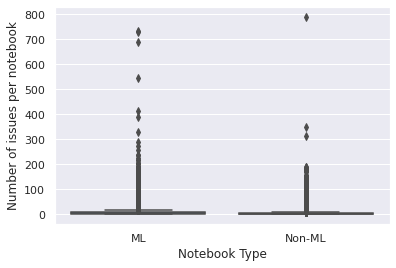

In [1073]:
fig = sns.boxplot(data=pd.concat([style_issue_e_ml_join_v2, style_issue_e_nonml_join_v2]), x="NB_Type", y="Frequency")
fig.set(xlabel='Notebook Type', ylabel='Number of issues per notebook')

fig.figure.savefig('box_e.pdf', bbox_inches="tight")

fig.figure.show()

In [1176]:
data = pd.concat([style_issue_r_ml_join_v2, style_issue_r_nonml_join_v2])
data.replace(0, np.nan, inplace=True)
               
data['frequency_log'] = np.log10(data['Frequency'])
data.fillna(0, inplace=True)

d_ml = data[data.NB_Type == 'ML'].frequency_log.to_numpy()
d_nonml = data[data.NB_Type == 'Non-ML'].frequency_log.to_numpy()

d_ml = np.array(np.round(d_ml * 10), dtype=np.int32)
d_nonml = np.array(np.round(d_nonml * 10), dtype=np.int32)


data = [d_ml, d_nonml]
data

[array([0, 5, 6, ..., 0, 0, 0], dtype=int32),
 array([8, 3, 0, ..., 0, 0, 0], dtype=int32)]

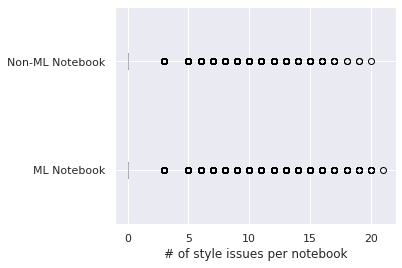

In [1177]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.DataFrame(data, index=['ML Notebook', 'Non-ML Notebook'])

df.T.boxplot(vert=False)
plt.subplots_adjust(left=0.25)
plt.xlabel('# of style issues per notebook')
plt.savefig('box_r_3.pdf', bbox_inches="tight")
plt.show()